In [172]:
import pandas as pd
import numpy as np

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.decomposition import PCA
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import collections
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,classification_report



import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)


In [254]:
# Reading the Data Set
raw_data = pd.read_csv("telecom_churn_data.csv")

In [255]:
def understanddata(datasernmae):
    print(datasernmae.shape)
    print("---"*10)
    datasernmae.info()
    print("---"*10)
    print(datasernmae.describe().transpose())
    print("---"*10)
    print(datasernmae.head())
understanddata(raw_data)

(99999, 226)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
------------------------------
                      count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.89950

4        0.00        0.00  


# Data Cleaning

In [256]:
# Delete the columns as it only single value
raw_data1 = raw_data.drop(["circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"
                          ,"last_date_of_month_9","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9","std_ic_t2o_mou_6","std_ic_t2o_mou_7",
                           'std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis=1)

In [257]:
col = raw_data.columns
for item in col:
    print(item)
    total = raw_data[item].value_counts().sum()
    print(raw_data[item].value_counts()/total)

mobile_number
7002374769    0.00001
7001115332    0.00001
7000945323    0.00001
7001852588    0.00001
7000146605    0.00001
               ...   
7001315706    0.00001
7000616311    0.00001
7000389462    0.00001
7001775481    0.00001
7000817664    0.00001
Name: mobile_number, Length: 99999, dtype: float64
circle_id
109    1.0
Name: circle_id, dtype: float64
loc_og_t2o_mou
0.0    1.0
Name: loc_og_t2o_mou, dtype: float64
std_og_t2o_mou
0.0    1.0
Name: std_og_t2o_mou, dtype: float64
loc_ic_t2o_mou
0.0    1.0
Name: loc_ic_t2o_mou, dtype: float64
last_date_of_month_6
6/30/2014    1.0
Name: last_date_of_month_6, dtype: float64
last_date_of_month_7
7/31/2014    1.0
Name: last_date_of_month_7, dtype: float64
last_date_of_month_8
8/31/2014    1.0
Name: last_date_of_month_8, dtype: float64
last_date_of_month_9
9/30/2014    1.0
Name: last_date_of_month_9, dtype: float64
arpu_6
 0.000      0.03731
 20.000     0.00099
-5.000      0.00096
 1.000      0.00069
 1.500      0.00060
             ...   


0.00      0.587329
0.28      0.002321
0.38      0.002196
0.33      0.002144
0.43      0.002030
            ...   
67.36     0.000010
129.01    0.000010
53.94     0.000010
35.26     0.000010
62.43     0.000010
Name: loc_og_t2f_mou_6, Length: 3860, dtype: float64
loc_og_t2f_mou_7
0.00      0.582317
0.38      0.002299
0.46      0.002226
0.36      0.002195
0.33      0.002195
            ...   
58.73     0.000010
43.04     0.000010
44.09     0.000010
35.08     0.000010
117.61    0.000010
Name: loc_og_t2f_mou_7, Length: 3863, dtype: float64
loc_og_t2f_mou_8
0.00     0.587555
0.38     0.002156
0.25     0.002156
0.23     0.002124
0.31     0.002071
           ...   
57.98    0.000011
25.29    0.000011
84.66    0.000011
51.01    0.000011
42.14    0.000011
Name: loc_og_t2f_mou_8, Length: 3807, dtype: float64
loc_og_t2f_mou_9
0.00      0.592571
0.38      0.002352
0.26      0.002168
0.31      0.002157
0.28      0.002135
            ...   
25.08     0.000011
101.68    0.000011
116.46    0.000011
128

0.00      0.565531
0.21      0.004185
0.01      0.003685
0.03      0.003102
0.08      0.002634
            ...   
51.63     0.000010
105.74    0.000010
43.96     0.000010
262.88    0.000010
54.41     0.000010
Name: spl_og_mou_6, Length: 3965, dtype: float64
spl_og_mou_7
0.00      0.524672
0.01      0.003932
0.21      0.002694
0.03      0.002663
0.08      0.002496
            ...   
28.20     0.000010
123.83    0.000010
144.23    0.000010
118.69    0.000010
64.54     0.000010
Name: spl_og_mou_7, Length: 4396, dtype: float64
spl_og_mou_8
0.00      0.508016
0.01      0.003847
0.03      0.002917
0.08      0.002896
0.06      0.002790
            ...   
40.43     0.000011
248.86    0.000011
25.03     0.000011
42.46     0.000011
16.00     0.000011
Name: spl_og_mou_8, Length: 4390, dtype: float64
spl_og_mou_9
0.00      0.527999
0.01      0.003783
0.03      0.003274
0.21      0.002894
0.06      0.002840
            ...   
89.84     0.000011
103.78    0.000011
63.26     0.000011
63.49     0.0000

0.00       0.141431
0.21       0.000810
0.20       0.000490
0.43       0.000350
1.01       0.000330
             ...   
954.74     0.000010
101.61     0.000010
2041.63    0.000010
1419.18    0.000010
778.66     0.000010
Name: total_og_mou_9, Length: 39160, dtype: float64
loc_ic_t2t_mou_6
0.00      0.128865
0.38      0.001083
0.33      0.001041
0.36      0.001041
0.43      0.001010
            ...   
285.84    0.000010
187.78    0.000010
267.28    0.000010
233.34    0.000010
501.64    0.000010
Name: loc_ic_t2t_mou_6, Length: 13540, dtype: float64
loc_ic_t2t_mou_7
0.00       0.121781
0.78       0.001207
0.33       0.001113
0.26       0.001009
0.66       0.000978
             ...   
1199.96    0.000010
305.38     0.000010
12.30      0.000010
159.56     0.000010
108.88     0.000010
Name: loc_ic_t2t_mou_7, Length: 13511, dtype: float64
loc_ic_t2t_mou_8
0.00      0.121590
0.36      0.001110
0.53      0.001046
0.43      0.001015
0.40      0.001004
            ...   
105.36    0.000011
76.73  

0.00      0.084331
0.18      0.000360
0.28      0.000260
0.20      0.000250
0.56      0.000240
            ...   
328.99    0.000010
474.56    0.000010
677.78    0.000010
876.39    0.000010
764.31    0.000010
Name: total_ic_mou_6, Length: 32247, dtype: float64
total_ic_mou_7
0.00       0.079621
0.20       0.000370
0.33       0.000240
0.26       0.000210
0.38       0.000210
             ...   
1199.46    0.000010
482.69     0.000010
291.31     0.000010
1138.08    0.000010
767.66     0.000010
Name: total_ic_mou_7, Length: 32242, dtype: float64
total_ic_mou_8
0.00       0.093451
0.46       0.000220
0.33       0.000210
0.66       0.000200
0.26       0.000200
             ...   
341.21     0.000010
168.86     0.000010
1041.38    0.000010
667.59     0.000010
760.14     0.000010
Name: total_ic_mou_8, Length: 32128, dtype: float64
total_ic_mou_9
0.00       0.114851
0.25       0.000280
0.26       0.000240
0.28       0.000230
0.53       0.000220
             ...   
396.74     0.000010
333.53    

0.00      0.799334
0.05      0.004348
0.06      0.004296
0.10      0.004223
0.46      0.003713
            ...   
222.61    0.000010
163.33    0.000010
82.06     0.000010
106.91    0.000010
23.81     0.000010
Name: ic_others_7, Length: 2002, dtype: float64
ic_others_8
0.00     0.770358
0.10     0.008782
0.06     0.008148
0.08     0.007144
0.13     0.005136
           ...   
41.70    0.000011
94.18    0.000011
22.99    0.000011
52.54    0.000011
21.89    0.000011
Name: ic_others_8, Length: 1896, dtype: float64
ic_others_9
0.00     0.780649
0.06     0.006135
0.10     0.005615
0.08     0.005366
0.13     0.003946
           ...   
26.40    0.000011
43.53    0.000011
13.49    0.000011
30.54    0.000011
20.23    0.000011
Name: ic_others_9, Length: 1923, dtype: float64
total_rech_num_6
4      0.115661
3      0.114451
5      0.104631
2      0.090061
6      0.088541
7      0.070261
8      0.056921
1      0.050051
9      0.046740
10     0.038760
11     0.031840
12     0.026200
13     0.021150
14

Name: date_of_last_rech_7, dtype: float64
date_of_last_rech_8
8/31/2014    0.152588
8/30/2014    0.121471
8/29/2014    0.104351
8/28/2014    0.101850
8/26/2014    0.096465
8/24/2014    0.080123
8/25/2014    0.079428
8/27/2014    0.059018
8/22/2014    0.020928
8/20/2014    0.020607
8/23/2014    0.018739
8/19/2014    0.016498
8/21/2014    0.013976
8/18/2014    0.010656
8/9/2014     0.010210
8/5/2014     0.009784
8/14/2014    0.009235
8/15/2014    0.008436
8/16/2014    0.007844
8/17/2014    0.007626
8/12/2014    0.007429
8/13/2014    0.007315
8/8/2014     0.007014
8/6/2014     0.006412
8/11/2014    0.005759
8/7/2014     0.004638
8/10/2014    0.003746
8/1/2014     0.002635
8/2/2014     0.002137
8/4/2014     0.001764
8/3/2014     0.001318
Name: date_of_last_rech_8, dtype: float64
date_of_last_rech_9
9/29/2014    0.237539
9/30/2014    0.227984
9/28/2014    0.111309
9/27/2014    0.067966
9/26/2014    0.065960
9/25/2014    0.058978
9/24/2014    0.033852
9/21/2014    0.030324
9/20/2014    0.027

Name: date_of_last_rech_data_6, dtype: float64
date_of_last_rech_data_7
7/31/2014    0.070901
7/29/2014    0.067225
7/30/2014    0.065113
7/28/2014    0.061828
7/26/2014    0.048453
7/27/2014    0.047476
7/25/2014    0.038950
7/24/2014    0.034492
7/23/2014    0.032889
7/22/2014    0.032459
7/21/2014    0.031794
7/14/2014    0.030073
7/19/2014    0.029760
7/18/2014    0.029174
7/17/2014    0.027492
7/20/2014    0.027062
7/16/2014    0.027023
7/7/2014     0.025850
7/12/2014    0.025615
7/13/2014    0.025185
7/9/2014     0.025028
7/10/2014    0.024520
7/15/2014    0.023699
7/8/2014     0.022838
7/11/2014    0.022252
7/5/2014     0.021587
7/4/2014     0.019710
7/6/2014     0.019475
7/3/2014     0.015525
7/1/2014     0.013453
7/2/2014     0.013101
Name: date_of_last_rech_data_7, dtype: float64
date_of_last_rech_data_8
8/31/2014    0.075857
8/30/2014    0.070883
8/29/2014    0.060936
8/28/2014    0.048407
8/27/2014    0.045598
8/25/2014    0.044117
8/26/2014    0.042864
8/24/2014    0.03709

Name: count_rech_3g_7, dtype: float64
count_rech_3g_8
0.0     0.630434
1.0     0.252401
2.0     0.067884
3.0     0.021831
4.0     0.009909
5.0     0.005505
6.0     0.003265
7.0     0.002392
8.0     0.001443
10.0    0.000949
9.0     0.000873
12.0    0.000532
11.0    0.000532
13.0    0.000456
15.0    0.000342
16.0    0.000266
14.0    0.000152
30.0    0.000114
20.0    0.000114
17.0    0.000114
18.0    0.000114
21.0    0.000076
23.0    0.000076
42.0    0.000038
19.0    0.000038
25.0    0.000038
29.0    0.000038
24.0    0.000038
45.0    0.000038
Name: count_rech_3g_8, dtype: float64
count_rech_3g_9
0.0     0.609058
1.0     0.270079
2.0     0.071252
3.0     0.021835
4.0     0.010724
5.0     0.006057
6.0     0.002546
8.0     0.001967
7.0     0.001736
11.0    0.000926
10.0    0.000694
9.0     0.000617
13.0    0.000617
12.0    0.000540
15.0    0.000231
16.0    0.000193
18.0    0.000154
21.0    0.000154
19.0    0.000116
26.0    0.000116
14.0    0.000077
24.0    0.000077
22.0    0.000077
23.0    

0     0.943269
1     0.042630
2     0.010160
3     0.002270
4     0.000740
5     0.000420
6     0.000260
7     0.000100
8     0.000050
9     0.000040
11    0.000020
16    0.000010
14    0.000010
12    0.000010
10    0.000010
Name: monthly_3g_7, dtype: float64
monthly_3g_8
0     0.939339
1     0.045670
2     0.010820
3     0.002510
4     0.000980
5     0.000340
6     0.000140
7     0.000110
9     0.000030
8     0.000030
10    0.000020
16    0.000010
Name: monthly_3g_8, dtype: float64
monthly_3g_9
0     0.935749
1     0.048900
2     0.011470
3     0.002410
4     0.000810
5     0.000350
6     0.000120
8     0.000070
7     0.000070
11    0.000030
9     0.000020
Name: monthly_3g_9, dtype: float64
sachet_3g_6
0     0.95819
1     0.02990
2     0.00607
3     0.00216
4     0.00108
5     0.00065
6     0.00045
7     0.00045
9     0.00024
8     0.00020
11    0.00012
10    0.00012
15    0.00005
12    0.00004
14    0.00004
19    0.00004
13    0.00003
18    0.00003
22    0.00003
23    0.00003
16    0

In [258]:
# Check for missing values
percent_missing = raw_data1.isnull().sum() * 100 / len(raw_data1)
missing_value_df = pd.DataFrame({'column_name': raw_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
mobile_number                        mobile_number         0.000000
arpu_6                                      arpu_6         0.000000
arpu_7                                      arpu_7         0.000000
arpu_8                                      arpu_8         0.000000
arpu_9                                      arpu_9         0.000000
onnet_mou_6                            onnet_mou_6         3.937039
onnet_mou_7                            onnet_mou_7         3.859039
onnet_mou_8                            onnet_mou_8         5.378054
onnet_mou_9                            onnet_mou_9         7.745077
offnet_mou_6                          offnet_mou_6         3.937039
offnet_mou_7                          offnet_mou_7         3.859039
offnet_mou_8                          offnet_mou_8         5.378054
offnet_mou_9                          offnet_mou_9         7.745077
roam_ic_mou_6                        roam_ic_mou_6         3.937039
roam_ic_mou_7                        roam_ic_mou_7         3.859039
roam_ic_mou_8                        roam_ic_mou_8         5.378054
roam_ic_mou_9                        roam_ic_mou_9         7.745077
roam_og_mou_6                        roam_og_mou_6         3.937039
roam_og_mou_7                        roam_og_mou_7         3.859039
roam_og_mou_8                        roam_og_mou_8         5.378054
roam_og_mou_9                        roam_og_mou_9         7.745077
loc_og_t2t_mou_6                  loc_og_t2t_mou_6         3.937039
loc_og_t2t_mou_7                  loc_og_t2t_mou_7         3.859039
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         5.378054
loc_og_t2t_mou_9                  loc_og_t2t_mou_9         7.745077
loc_og_t2m_mou_6                  loc_og_t2m_mou_6         3.937039
loc_og_t2m_mou_7                  loc_og_t2m_mou_7         3.859039
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         5.378054
loc_og_t2m_mou_9                  loc_og_t2m_mou_9         7.745077
loc_og_t2f_mou_6                  loc_og_t2f_mou_6         3.937039
loc_og_t2f_mou_7                  loc_og_t2f_mou_7         3.859039
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         5.378054
loc_og_t2f_mou_9                  loc_og_t2f_mou_9         7.745077
loc_og_t2c_mou_6                  loc_og_t2c_mou_6         3.937039
loc_og_t2c_mou_7                  loc_og_t2c_mou_7         3.859039
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         5.378054
loc_og_t2c_mou_9                  loc_og_t2c_mou_9         7.745077
loc_og_mou_6                          loc_og_mou_6         3.937039
loc_og_mou_7                          loc_og_mou_7         3.859039
loc_og_mou_8                          loc_og_mou_8         5.378054
loc_og_mou_9                          loc_og_mou_9         7.745077
std_og_t2t_mou_6                  std_og_t2t_mou_6         3.937039
std_og_t2t_mou_7                  std_og_t2t_mou_7         3.859039
std_og_t2t_mou_8                  std_og_t2t_mou_8         5.378054
std_og_t2t_mou_9                  std_og_t2t_mou_9         7.745077
std_og_t2m_mou_6                  std_og_t2m_mou_6         3.937039
std_og_t2m_mou_7                  std_og_t2m_mou_7         3.859039
std_og_t2m_mou_8                  std_og_t2m_mou_8         5.378054
std_og_t2m_mou_9                  std_og_t2m_mou_9         7.745077
std_og_t2f_mou_6                  std_og_t2f_mou_6         3.937039
std_og_t2f_mou_7                  std_og_t2f_mou_7         3.859039
std_og_t2f_mou_8                  std_og_t2f_mou_8         5.378054
std_og_t2f_mou_9                  std_og_t2f_mou_9         7.745077
std_og_mou_6                          std_og_mou_6         3.937039
std_og_mou_7                          std_og_mou_7         3.859039
std_og_mou_8                          std_og_mou_8         5.378054
std_og_mou_9                          std_og_mou_9         7.745077
isd_og_mou_6                          isd_og_mou_6         3.937039
isd_og_mou_7               

In [259]:
# Creating to seprate new dataset for treating the missing value
raw_data2= raw_data1.filter(["mobile_number","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9",
                           "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9",
                           "total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9","max_rech_data_6","max_rech_data_7",
                           "max_rech_data_8","max_rech_data_9","count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9",
                           "count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9","av_rech_amt_data_6","av_rech_amt_data_7",
                           "av_rech_amt_data_8","av_rech_amt_data_9","arpu_3g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9","night_pck_user_6",
                           "night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9","arpu_3g_7",
                           "arpu_3g_8","arpu_3g_9","arpu_2g_6"])


In [260]:
raw_data3 =raw_data1.drop(["mobile_number","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9",
                           "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9",
                           "total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9","max_rech_data_6","max_rech_data_7",
                           "max_rech_data_8","max_rech_data_9","count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9",
                           "count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9","av_rech_amt_data_6","av_rech_amt_data_7",
                           "av_rech_amt_data_8","av_rech_amt_data_9","arpu_3g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9","night_pck_user_6",
                           "night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9","arpu_3g_7",
                           "arpu_3g_8","arpu_3g_9","arpu_2g_6"],axis=1)

In [261]:
print(raw_data2.shape)
print(raw_data3.shape)

(99999, 45)
(99999, 165)


In [262]:
# Filling raw_data3 all columns with 0 
raw_data3 = raw_data3.fillna(0.00)

In [263]:
# Converting all date fields to to_date
raw_data2['date_of_last_rech_6']= pd.to_datetime(raw_data2['date_of_last_rech_6'])
raw_data2['date_of_last_rech_7']= pd.to_datetime(raw_data2['date_of_last_rech_7'])
raw_data2['date_of_last_rech_8']= pd.to_datetime(raw_data2['date_of_last_rech_8'])
raw_data2['date_of_last_rech_9']= pd.to_datetime(raw_data2['date_of_last_rech_9'])
raw_data2['date_of_last_rech_data_6']= pd.to_datetime(raw_data2['date_of_last_rech_data_6'])
raw_data2['date_of_last_rech_data_7']= pd.to_datetime(raw_data2['date_of_last_rech_data_7'])
raw_data2['date_of_last_rech_data_8']= pd.to_datetime(raw_data2['date_of_last_rech_data_8'])
raw_data2['date_of_last_rech_data_9']= pd.to_datetime(raw_data2['date_of_last_rech_data_9'])

In [265]:
# Changing the date format
raw_data2['date_of_last_rech_6'] = raw_data2['date_of_last_rech_6'].dt.strftime('%d')
raw_data2['date_of_last_rech_7'] = raw_data2['date_of_last_rech_7'].dt.strftime('%d')
raw_data2['date_of_last_rech_8'] = raw_data2['date_of_last_rech_8'].dt.strftime('%d')
raw_data2['date_of_last_rech_9'] = raw_data2['date_of_last_rech_9'].dt.strftime('%d')
raw_data2['date_of_last_rech_data_6']= raw_data2['date_of_last_rech_data_6'].dt.strftime('%d')
raw_data2['date_of_last_rech_data_7']= raw_data2['date_of_last_rech_data_7'].dt.strftime('%d')
raw_data2['date_of_last_rech_data_8']= raw_data2['date_of_last_rech_data_8'].dt.strftime('%d')
raw_data2['date_of_last_rech_data_9']= raw_data2['date_of_last_rech_data_9'].dt.strftime('%d')

AttributeError: Can only use .dt accessor with datetimelike values

In [266]:
# Updating all date type to float
types = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7'
        ,'date_of_last_rech_data_8','date_of_last_rech_data_9']
for items in types:
    raw_data2[items] = raw_data2[items].astype(float)
   

In [267]:
# Extracting the day from the month
raw_data2['date_of_last_rech_6'] = 30-raw_data2['date_of_last_rech_6']
raw_data2['date_of_last_rech_7'] = 31-raw_data2['date_of_last_rech_7']
raw_data2['date_of_last_rech_8'] = 31-raw_data2['date_of_last_rech_8']
raw_data2['date_of_last_rech_9'] = 30-raw_data2['date_of_last_rech_9']
raw_data2['date_of_last_rech_data_6'] = 30-raw_data2['date_of_last_rech_data_6']
raw_data2['date_of_last_rech_data_7'] = 31-raw_data2['date_of_last_rech_data_7']
raw_data2['date_of_last_rech_data_8'] = 31-raw_data2['date_of_last_rech_data_8']
raw_data2['date_of_last_rech_data_9'] = 30-raw_data2['date_of_last_rech_data_9']

In [268]:
# checking for missing values in raw_data2
percent_missing = raw_data2.isnull().sum() * 100 / len(raw_data2)
missing_value_df = pd.DataFrame({'column_name': raw_data2.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
mobile_number                        mobile_number         0.000000
date_of_last_rech_6            date_of_last_rech_6         1.607016
date_of_last_rech_7            date_of_last_rech_7         1.767018
date_of_last_rech_8            date_of_last_rech_8         3.622036
date_of_last_rech_9            date_of_last_rech_9         4.760048
date_of_last_rech_data_6  date_of_last_rech_data_6        74.846748
date_of_last_rech_data_7  date_of_last_rech_data_7        74.428744
date_of_last_rech_data_8  date_of_last_rech_data_8        73.660737
date_of_last_rech_data_9  date_of_last_rech_data_9        74.077741
total_rech_data_6                total_rech_data_6        74.846748
total_rech_data_7                total_rech_data_7        74.428744
total_rech_data_8                total_rech_data_8        73.660737
total_rech_data_9                total_rech_data_9        74.077741
max_rech_data_6                    max_rech_data_6        74.846748
max_rech_data_7                    max_rech_data_7        74.428744
max_rech_data_8                    max_rech_data_8        73.660737
max_rech_data_9                    max_rech_data_9        74.077741
count_rech_2g_6                    count_rech_2g_6        74.846748
count_rech_2g_7                    count_rech_2g_7        74.428744
count_rech_2g_8                    count_rech_2g_8        73.660737
count_rech_2g_9                    count_rech_2g_9        74.077741
count_rech_3g_6                    count_rech_3g_6        74.846748
count_rech_3g_7                    count_rech_3g_7        74.428744
count_rech_3g_8                    count_rech_3g_8        73.660737
count_rech_3g_9                    count_rech_3g_9        74.077741
av_rech_amt_data_6              av_rech_amt_data_6        74.846748
av_rech_amt_data_7              av_rech_amt_data_7        74.428744
av_rech_amt_data_8              av_rech_amt_data_8        73.660737
av_rech_amt_data_9              av_rech_amt_data_9        74.077741
arpu_3g_6                                arpu_3g_6        74.846748
arpu_2g_7                                arpu_2g_7        74.428744
arpu_2g_8                                arpu_2g_8        73.660737
arpu_2g_9                                arpu_2g_9        74.077741
night_pck_user_6                  night_pck_user_6        74.846748
night_pck_user_7                  night_pck_user_7        74.428744
night_pck_user_8                  night_pck_user_8        73.660737
night_pck_user_9                  night_pck_user_9        74.077741
fb_user_6                                fb_user_6        74.846748
fb_user_7                                fb_user_7        74.428744
fb_user_8                                fb_user_8        73.660737
fb_user_9                                fb_user_9        74.077741
arpu_3g_7                                arpu_3g_7        74.428744
arpu_3g_8                                arpu_3g_8        73.660737
arpu_3g_9                                arpu_3g_9        74.077741
arpu_2g_6                                arpu_2g_6        74.846748

In [269]:
# Filling raw_data2 all columns with 0 
raw_data2 = raw_data2.fillna(0.00)

In [329]:
# Making one Clean one dataset
clean_data = pd.concat([raw_data2,raw_data3], axis=1)

### Outliers

In [357]:
def outliers_threshold(dataframe, column):
    q1 = dataframe[column].quantile(0.05)
    q3 = dataframe[column].quantile(0.95)
    inter_quartile_range = q3 - q1
    low = q1 - 1.5 * inter_quartile_range
    up = q3 + 1.5 * inter_quartile_range
    return low, up

In [358]:
def grab_outlier(dataframe, column, index=False):
    low, up = outliers_threshold(dataframe, column)
    if dataframe[(dataframe[column] < low) |
                 (dataframe[column] > up)].shape[0] < 10:
        print(dataframe[(dataframe[column] < low) | (dataframe[column] > up)])
    else:
        print(dataframe[(dataframe[column] < low) |
                 (dataframe[column] > up)].head())
    if index:
        outlier_index = dataframe[(dataframe[column] < low) |
                                  (dataframe[column] > up)].index
        print(outlier_index.index)
        return outlier_index

In [359]:
for col in num_cols:
    grab_outlier(clean_data[num_cols], col)

Empty DataFrame
Columns: [last_rech__days_6, last_rech__days_7, last_rech__days_8, date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8, total_rech_data_6, total_rech_data_7, total_rech_data_8, max_rech_data_6, max_rech_data_7, max_rech_data_8, count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, arpu_3g_6, arpu_2g_7, arpu_2g_8, night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8, arpu_3g_7, arpu_3g_8, arpu_2g_6, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_o

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1084                0.0                4.0                2.0   
1623                0.0               14.0                5.0   
1644                0.0                0.0                0.0   
1703                0.0                2.0                0.0   
2387                1.0               14.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1084                       0.0                       4.0   
1623                       0.0                      14.0   
1644                       1.0                       0.0   
1703                       0.0                       2.0   
2387                       1.0                      14.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1084                       2.0               20.0                8.0   
1623                       0.0               18.0                7.0   
1644                       0.0  

3956            1            0  1086    155.88      0.00      0.00      0  
       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
4275                 9.0                4.0               22.0   
10651                0.0                1.0                3.0   
11812                3.0               16.0                0.0   
16719                1.0                3.0                4.0   
19494                8.0               16.0               22.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
4275                       19.0                       0.0   
10651                       9.0                      12.0   
11812                       4.0                       0.0   
16719                      14.0                      11.0   
19494                       9.0                       0.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
4275                       26.0                1.0                0.0   
10651         

10651      0.00      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
3157                3.0                4.0                5.0   
6189                2.0                3.0                0.0   
7024               18.0               16.0                7.0   
7461                1.0               16.0                5.0   
8603                2.0               10.0                6.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
3157                       6.0                       0.0   
6189                      14.0                       3.0   
7024                      23.0                       0.0   
7461                      14.0                      16.0   
8603                       0.0                      22.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
3157                       5.0                2.0                0.0   
6189                       0.0                1.0                6.0   
7024   

8603            0            0  2465    182.17      0.00     16.01      0  
       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1084                 0.0                4.0                2.0   
1623                 0.0               14.0                5.0   
1644                 0.0                0.0                0.0   
8294                 1.0                1.0                1.0   
14208                1.0                3.0                2.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
1084                        0.0                       4.0   
1623                        0.0                      14.0   
1644                        1.0                       0.0   
8294                        1.0                       1.0   
14208                       1.0                       3.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1084                        2.0               20.0                8.0   
1623          

4891            0            0   821      0.00      0.00      0.00      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
56                  2.0                1.0                0.0   
322                 0.0                2.0                1.0   
1644                0.0                0.0                0.0   
2387                1.0               14.0                2.0   
2399                1.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
56                        13.0                       4.0   
322                        0.0                       2.0   
1644                       1.0                       0.0   
2387                       1.0                      14.0   
2399                       6.0                       9.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
56                         0.0                2.0               12.0   
322                        1

3310            7            6  1064      0.00      0.00      0.00      1  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1644                0.0                0.0                0.0   
1703                0.0                2.0                0.0   
2069                1.0                0.0                0.0   
2544                2.0                0.0                5.0   
2757               12.0                5.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1644                       1.0                       0.0   
1703                       0.0                       2.0   
2069                       1.0                       0.0   
2544                       2.0                       2.0   
2757                      19.0                       5.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1644                       0.0               29.0               42.0   
1703                       0

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1644                0.0                0.0                0.0   
1703                0.0                2.0                0.0   
2399                1.0                0.0                0.0   
3310                4.0                3.0                4.0   
3492                0.0                1.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1644                       1.0                       0.0   
1703                       0.0                       2.0   
2399                       6.0                       9.0   
3310                       4.0                       3.0   
3492                       2.0                       2.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1644                       0.0               29.0               42.0   
1703                       0.0               23.0               17.0   
2399                       0.0  

10274      0.00      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
2399                1.0                0.0                0.0   
4145                6.0                3.0                3.0   
6189                2.0                3.0                0.0   
7778                6.0                0.0                2.0   
9661                3.0               16.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
2399                       6.0                       9.0   
4145                       6.0                       3.0   
6189                      14.0                       3.0   
7778                       6.0                       0.0   
9661                       4.0                      26.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
2399                       0.0                7.0                2.0   
4145                       3.0                2.0                3.0   
6189   

2757            5            2  1113     89.53   1785.58   2826.36      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1644                0.0                0.0                0.0   
2399                1.0                0.0                0.0   
2678                1.0                0.0                2.0   
2956                1.0                9.0                1.0   
3157                3.0                4.0                5.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1644                       1.0                       0.0   
2399                       6.0                       9.0   
2678                       1.0                      23.0   
2956                       0.0                       0.0   
3157                       6.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1644                       0.0               29.0               42.0   
2399                       0

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
285                 4.0                2.0                7.0   
481                 6.0               12.0                2.0   
539                 2.0                0.0               30.0   
1523                0.0               14.0                3.0   
1703                0.0                2.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
285                       10.0                       2.0   
481                       22.0                       0.0   
539                        9.0                       0.0   
1523                       2.0                      14.0   
1703                       0.0                       2.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
285                        9.0                1.0                4.0   
481                       16.0                3.0                0.0   
539                        0.0  

1703           15            7  1035      0.00      0.00      0.00      0  
Empty DataFrame
Columns: [last_rech__days_6, last_rech__days_7, last_rech__days_8, date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8, total_rech_data_6, total_rech_data_7, total_rech_data_8, max_rech_data_6, max_rech_data_7, max_rech_data_8, count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, arpu_3g_6, arpu_2g_7, arpu_2g_8, night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8, arpu_3g_7, arpu_3g_8, arpu_2g_6, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, l

2544            5            1   369    662.84    962.72    217.56      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1205                5.0               16.0                8.0   
1644                0.0                0.0                0.0   
2399                1.0                0.0                0.0   
2678                1.0                0.0                2.0   
2956                1.0                9.0                1.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1205                       5.0                       0.0   
1644                       1.0                       0.0   
2399                       6.0                       9.0   
2678                       1.0                      23.0   
2956                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1205                       8.0                1.0                0.0   
1644                       0

7957            0            0   438      0.00      0.00    109.49      0  
Empty DataFrame
Columns: [last_rech__days_6, last_rech__days_7, last_rech__days_8, date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8, total_rech_data_6, total_rech_data_7, total_rech_data_8, max_rech_data_6, max_rech_data_7, max_rech_data_8, count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, arpu_3g_6, arpu_2g_7, arpu_2g_8, night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8, arpu_3g_7, arpu_3g_8, arpu_2g_6, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, l

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
18098               13.0               10.0                1.0   
18225                1.0                0.0                0.0   
20575                5.0                0.0                1.0   
27075                1.0                1.0                0.0   
38207                3.0                1.0                6.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
18098                      18.0                      22.0   
18225                      11.0                       0.0   
20575                      13.0                      16.0   
27075                       0.0                       0.0   
38207                       8.0                       6.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
18098                      12.0                1.0                1.0   
18225                      13.0                1.0                0.0   
20575            

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
173                 1.0                1.0                0.0   
218                 1.0                1.0                0.0   
529                 0.0                1.0                0.0   
642                 4.0                2.0                0.0   
1725                1.0                4.0                1.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
173                        0.0                      18.0   
218                        2.0                       4.0   
529                        6.0                       0.0   
642                        0.0                       0.0   
1725                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
173                       21.0                0.0                1.0   
218                        1.0               12.0               12.0   
529                        0.0  

12850       0.0      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
346                 1.0                0.0                1.0   
709                 1.0                3.0                0.0   
856                 5.0               11.0                5.0   
1214                0.0                0.0                4.0   
1292                8.0                6.0               10.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
346                       11.0                      15.0   
709                        2.0                       0.0   
856                        5.0                       0.0   
1214                       2.0                       3.0   
1292                       8.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
346                        5.0                1.0                1.0   
709                        0.0                1.0                0.0   
856    

1011            0            0   458       0.0       0.0       0.0      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
496                 1.0                2.0                3.0   
560                 3.0                7.0                6.0   
806                 0.0                7.0               17.0   
856                 5.0               11.0                5.0   
1129                0.0                0.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
496                        2.0                      10.0   
560                        5.0                       9.0   
806                        0.0                       7.0   
856                        5.0                       0.0   
1129                       0.0                       3.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
496                       20.0                1.0                1.0   
560                       24

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
101                 5.0                2.0                1.0   
375                 4.0                8.0               16.0   
733                 4.0                2.0                1.0   
807                 0.0                2.0                1.0   
1214                0.0                0.0                4.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
101                       20.0                      26.0   
375                        0.0                       0.0   
733                        4.0                      24.0   
807                        5.0                      13.0   
1214                       2.0                       3.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
101                        1.0                1.0                1.0   
375                        0.0                0.0                0.0   
733                        0.0  

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
101                5.0                2.0                1.0   
199                0.0                4.0                6.0   
496                1.0                2.0                3.0   
560                3.0                7.0                6.0   
570                1.0                6.0                3.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
101                      20.0                      26.0   
199                       0.0                       0.0   
496                       2.0                      10.0   
560                       5.0                       9.0   
570                       0.0                       0.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
101                       1.0                1.0                1.0   
199                       0.0                0.0                0.0   
496                      20.0                1.

3447            0            0   606      0.00      0.00      0.00      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
82                 11.0                3.0                7.0   
133                 4.0                0.0                3.0   
1200                0.0                0.0                4.0   
1470                4.0                1.0                2.0   
2021                0.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
82                         0.0                       0.0   
133                        4.0                       7.0   
1200                      16.0                       0.0   
1470                       0.0                       0.0   
2021                       1.0                       6.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
82                        11.0                0.0                0.0   
133                       25

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
2239                11.0                2.0               19.0   
3620                 8.0                6.0                4.0   
6863                 5.0                0.0                2.0   
7482                 5.0                6.0                3.0   
12165                2.0                2.0                1.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
2239                       11.0                       0.0   
3620                        0.0                       0.0   
6863                        0.0                       0.0   
7482                        0.0                       0.0   
12165                       0.0                       0.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
2239                        0.0                1.0                0.0   
3620                        4.0                0.0                0.0   
6863             

957    147.68    146.99      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
131                 2.0                0.0                3.0   
173                 1.0                1.0                0.0   
1470                4.0                1.0                2.0   
1789                8.0                3.0                0.0   
2081                8.0               22.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
131                        0.0                       0.0   
173                        0.0                      18.0   
1470                       0.0                       0.0   
1789                      21.0                      25.0   
2081                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
131                        0.0                0.0                0.0   
173                       21.0                0.0                1.0   

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
87                  2.0                2.0                0.0   
131                 2.0                0.0                3.0   
173                 1.0                1.0                0.0   
941                 6.0                1.0                4.0   
1044                9.0                8.0                7.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
87                         0.0                       2.0   
131                        0.0                       0.0   
173                        0.0                      18.0   
941                        0.0                       0.0   
1044                       9.0                      13.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
87                         6.0                0.0                2.0   
131                        0.0                0.0                0.0   
173                       21.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
124                 0.0                0.0                1.0   
218                 1.0                1.0                0.0   
323                 9.0                9.0               18.0   
996                13.0               14.0               15.0   
1075                5.0                0.0                3.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
124                        9.0                      13.0   
218                        2.0                       4.0   
323                        9.0                       0.0   
996                       13.0                      14.0   
1075                      16.0                      16.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
124                        0.0                6.0                2.0   
218                        1.0               12.0               12.0   
323                        0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
2239               11.0                2.0               19.0   
3620                8.0                6.0                4.0   
6863                5.0                0.0                2.0   
7451                0.0                0.0                3.0   
7482                5.0                6.0                3.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
2239                      11.0                       0.0   
3620                       0.0                       0.0   
6863                       0.0                       0.0   
7451                      19.0                       5.0   
7482                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
2239                       0.0                1.0                0.0   
3620                       4.0                0.0                0.0   
6863                       0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1292                8.0                6.0               10.0   
1775                3.0                2.0                6.0   
2653                0.0                0.0                0.0   
5725                1.0                5.0               24.0   
7217                0.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1292                       8.0                       0.0   
1775                       0.0                       0.0   
2653                       0.0                       0.0   
5725                      16.0                       0.0   
7217                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1292                      10.0                1.0                0.0   
1775                       0.0                0.0                0.0   
2653                       0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
822                 2.0                2.0                1.0   
2729                6.0                8.0                6.0   
3284                1.0                0.0                1.0   
4003                6.0                0.0                4.0   
5892                2.0                4.0                4.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
822                        2.0                       0.0   
2729                       0.0                       0.0   
3284                       0.0                      24.0   
4003                       0.0                       0.0   
5892                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
822                        3.0                2.0                0.0   
2729                      18.0                0.0                0.0   
3284                       0.0  

744      0.00      0.00      0  
     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
20                16.0               21.0                4.0   
41                 6.0                9.0                0.0   
170                0.0                3.0                4.0   
209                0.0                3.0                0.0   
346                1.0                0.0                1.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
20                        0.0                       0.0   
41                        0.0                       0.0   
170                       0.0                       3.0   
209                       0.0                       0.0   
346                      11.0                      15.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
20                        0.0                0.0                0.0   
41                        0.0                0.0                0.0   
170           

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
20                16.0               21.0                4.0   
41                 6.0                9.0                0.0   
96                 0.0                3.0                2.0   
346                1.0                0.0                1.0   
365                0.0               12.0                2.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
20                        0.0                       0.0   
41                        0.0                       0.0   
96                        0.0                       0.0   
346                      11.0                      15.0   
365                       5.0                      14.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
20                        0.0                0.0                0.0   
41                        0.0                0.0                0.0   
96                        0.0                0.

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
529                 0.0                1.0                0.0   
1725                1.0                4.0                1.0   
7942                0.0                0.0                1.0   
8021                0.0                0.0                1.0   
9447                0.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
529                        6.0                       0.0   
1725                       0.0                       0.0   
7942                       0.0                       0.0   
8021                       0.0                       0.0   
9447                      19.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
529                        0.0                1.0                0.0   
1725                       0.0                0.0                0.0   
7942                       0.0  

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
20                16.0               21.0                4.0   
41                 6.0                9.0                0.0   
47                13.0                4.0               26.0   
96                 0.0                3.0                2.0   
134               14.0                6.0               14.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
20                        0.0                       0.0   
41                        0.0                       0.0   
47                       18.0                       0.0   
96                        0.0                       0.0   
134                      14.0                      15.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
20                        0.0                0.0                0.0   
41                        0.0                0.0                0.0   
47                        0.0                1.

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
642                 4.0                2.0                0.0   
806                 0.0                7.0               17.0   
1802                5.0                1.0                0.0   
2407                2.0                2.0                5.0   
2726                0.0                0.0                6.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
642                        0.0                       0.0   
806                        0.0                       7.0   
1802                       0.0                       0.0   
2407                      27.0                       2.0   
2726                       0.0                      18.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
642                        0.0                0.0                0.0   
806                       17.0                4.0                2.0   
1802                       0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
587                 3.0                2.0                3.0   
1719                4.0                0.0                1.0   
3296                0.0                1.0                4.0   
3650                4.0                0.0                1.0   
3710                0.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
587                        0.0                       0.0   
1719                       4.0                      15.0   
3296                       0.0                       2.0   
3650                       0.0                       0.0   
3710                      23.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
587                        0.0                0.0                0.0   
1719                       1.0                2.0                1.0   
3296                       7.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
345                 1.0                7.0                3.0   
2407                2.0                2.0                5.0   
2606                2.0                6.0                6.0   
3424                2.0                0.0                7.0   
4879                0.0                2.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
345                        1.0                      17.0   
2407                      27.0                       2.0   
2606                       8.0                       0.0   
3424                       0.0                       0.0   
4879                       7.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
345                        0.0                4.0                3.0   
2407                       0.0                1.0                1.0   
2606                       0.0  

Index: []
       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
8021                 0.0                0.0                1.0   
12607                1.0                1.0                2.0   
14634                0.0                0.0                3.0   
15055                3.0                0.0                0.0   
16198                2.0                1.0                1.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
8021                        0.0                       0.0   
12607                       0.0                       0.0   
14634                       0.0                       3.0   
15055                       0.0                       5.0   
16198                      10.0                       0.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
8021                        0.0                0.0                0.0   
12607                       0.0                0.0                0.0   
14634  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
920                 0.0                0.0                8.0   
1413                1.0                0.0                1.0   
1950                0.0                2.0                1.0   
2823                6.0                6.0                7.0   
4043                0.0               11.0                3.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
920                        0.0                       0.0   
1413                       1.0                       0.0   
1950                       0.0                       5.0   
2823                       6.0                      10.0   
4043                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
920                        0.0                0.0                0.0   
1413                       1.0                2.0                4.0   
1950                       1.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1470                4.0                1.0                2.0   
1889                3.0                0.0                2.0   
2021                0.0                0.0                0.0   
4043                0.0               11.0                3.0   
4169                4.0                1.0                6.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1470                       0.0                       0.0   
1889                       0.0                       0.0   
2021                       1.0                       6.0   
4043                       0.0                       0.0   
4169                       4.0                       7.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1470                       0.0                0.0                0.0   
1889                       0.0                0.0                0.0   
2021                      10.0  

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
5707                 0.0                2.0                2.0   
6536                 4.0               10.0               10.0   
7287                 0.0                0.0                0.0   
9749                 3.0                1.0                0.0   
10323                4.0                3.0                3.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
5707                        5.0                       4.0   
6536                        0.0                       0.0   
7287                        0.0                       0.0   
9749                        0.0                       0.0   
10323                      21.0                       3.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
5707                       12.0                4.0               10.0   
6536                        0.0                0.0                0.0   
7287             

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
61                  2.0                2.0                8.0   
278                 1.0                0.0                0.0   
1278               14.0               16.0                3.0   
1409                0.0                0.0                1.0   
1455                8.0               11.0                4.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
61                        19.0                      21.0   
278                       21.0                       0.0   
1278                      16.0                      26.0   
1409                       0.0                       2.0   
1455                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
61                        24.0                2.0                1.0   
278                       25.0                1.0                2.0   
1278                      27.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
550                 0.0                0.0                0.0   
1278               14.0               16.0                3.0   
1409                0.0                0.0                1.0   
1455                8.0               11.0                4.0   
1470                4.0                1.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
550                        4.0                      21.0   
1278                      16.0                      26.0   
1409                       0.0                       2.0   
1455                       0.0                       0.0   
1470                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
550                        0.0                2.0                2.0   
1278                      27.0                2.0                1.0   
1409                       1.0  

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
3697                 1.0                1.0                0.0   
5567                 3.0                2.0                5.0   
6852                 3.0                4.0                2.0   
10392                1.0                0.0                1.0   
10430               10.0                3.0                5.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
3697                        1.0                       0.0   
5567                        0.0                       3.0   
6852                        0.0                       0.0   
10392                      22.0                      25.0   
10430                      10.0                       3.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
3697                       17.0                4.0                0.0   
5567                        0.0                0.0                1.0   
6852             

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
218                 1.0                1.0                0.0   
341                12.0               19.0                5.0   
560                 3.0                7.0                6.0   
625                26.0                9.0                8.0   
1214                0.0                0.0                4.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
218                        2.0                       4.0   
341                       24.0                       0.0   
560                        5.0                       9.0   
625                       26.0                      28.0   
1214                       2.0                       3.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
218                        1.0               12.0               12.0   
341                       11.0                4.0                0.0   
560                       24.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
407                 4.0                0.0                0.0   
625                26.0                9.0                8.0   
730                 0.0                3.0                6.0   
947                 1.0                1.0                5.0   
1235                5.0                2.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
407                       12.0                      15.0   
625                       26.0                      28.0   
730                        0.0                       3.0   
947                        0.0                       0.0   
1235                      16.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
407                        0.0                1.0                1.0   
625                       29.0                1.0                1.0   
730                        6.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
346                 1.0                0.0                1.0   
619                11.0               15.0               11.0   
957                14.0               15.0               15.0   
1214                0.0                0.0                4.0   
1235                5.0                2.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
346                       11.0                      15.0   
619                        0.0                       0.0   
957                        0.0                      24.0   
1214                       2.0                       3.0   
1235                      16.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
346                        5.0                1.0                1.0   
619                        0.0                0.0                0.0   
957                       15.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
499                 3.0                6.0                0.0   
548                 2.0                0.0                3.0   
550                 0.0                0.0                0.0   
1054                8.0                1.0               15.0   
1115                3.0                8.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
499                        0.0                       0.0   
548                        0.0                       0.0   
550                        4.0                      21.0   
1054                       0.0                       0.0   
1115                      19.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
499                        0.0                0.0                0.0   
548                        0.0                0.0                0.0   
550                        0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
947                 1.0                1.0                5.0   
2266                0.0                6.0                2.0   
2308                0.0                7.0                0.0   
3185                0.0                3.0                6.0   
3425                4.0                2.0                1.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
947                        0.0                       0.0   
2266                       0.0                       0.0   
2308                       0.0                       0.0   
3185                       0.0                       3.0   
3425                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
947                        0.0                0.0                0.0   
2266                       4.0                0.0                0.0   
2308                       0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
346                 1.0                0.0                1.0   
1214                0.0                0.0                4.0   
1235                5.0                2.0                2.0   
1602               12.0               15.0                2.0   
2221                0.0                2.0                5.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
346                       11.0                      15.0   
1214                       2.0                       3.0   
1235                      16.0                       0.0   
1602                      29.0                      30.0   
2221                      27.0                       2.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
346                        5.0                1.0                1.0   
1214                       4.0                2.0                1.0   
1235                      11.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
2495                0.0               10.0                7.0   
2729                6.0                8.0                6.0   
5707                0.0                2.0                2.0   
6852                3.0                4.0                2.0   
9749                3.0                1.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
2495                       0.0                       0.0   
2729                       0.0                       0.0   
5707                       5.0                       4.0   
6852                       0.0                       0.0   
9749                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
2495                       0.0                0.0                0.0   
2729                      18.0                0.0                0.0   
5707                      12.0  

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
18887                9.0                8.0                3.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
18887                      11.0                      11.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
18887                      10.0                1.0                1.0   

       total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
18887                1.0            252.0            198.0            252.0   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
18887              0.0              1.0              0.0              1.0   

       count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  \
18887              0.0              1.0               252.0   

       av_rech_amt_data_7  av_rech_amt_data_8  arpu_3g_6  arpu_2g_7  \
18887               198.0               252.0     212.18        5.5   

       arpu_2

804    106.77     81.17      0  
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
220                 6.0                8.0                7.0   
460                 1.0                1.0                7.0   
1065                0.0                1.0                1.0   
2029                0.0                4.0                0.0   
2349                3.0                1.0                4.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
220                        0.0                       0.0   
460                        1.0                       4.0   
1065                       0.0                       0.0   
2029                       1.0                       4.0   
2349                       7.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
220                        0.0                0.0                0.0   
460                       18.0                6.0                5.0   

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
41                 6.0                9.0                0.0   
170                0.0                3.0                4.0   
585                4.0                2.0                7.0   
720                4.0                1.0               16.0   
721                3.0                0.0                7.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
41                        0.0                       0.0   
170                       0.0                       3.0   
585                       0.0                       0.0   
720                       0.0                       0.0   
721                       0.0                       0.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
41                        0.0                0.0                0.0   
170                       6.0                2.0                1.0   
585                       0.0                0.

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
41                 6.0                9.0                0.0   
585                4.0                2.0                7.0   
632                8.0               12.0                7.0   
720                4.0                1.0               16.0   
733                4.0                2.0                1.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
41                        0.0                       0.0   
585                       0.0                       0.0   
632                       8.0                      12.0   
720                       0.0                       0.0   
733                       4.0                      24.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
41                        0.0                0.0                0.0   
585                       0.0                0.0                0.0   
632                      11.0                1.

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
41                 6.0                9.0                0.0   
170                0.0                3.0                4.0   
191               18.0                1.0                0.0   
212                4.0                1.0                1.0   
585                4.0                2.0                7.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
41                        0.0                       0.0   
170                       0.0                       3.0   
191                      28.0                       1.0   
212                       4.0                       3.0   
585                       0.0                       0.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
41                        0.0                0.0                0.0   
170                       6.0                2.0                1.0   
191                       0.0                1.

1011            0            0   458       0.0       0.0       0.0      0  
     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
61                 2.0                2.0                8.0   
244                1.0                2.0                1.0   
499                3.0                6.0                0.0   
552                3.0                0.0                1.0   
553                0.0                0.0                0.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
61                       19.0                      21.0   
244                       0.0                       2.0   
499                       0.0                       0.0   
552                       0.0                       0.0   
553                       0.0                       0.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
61                       24.0                2.0                1.0   
244                       4.0             

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
60                 4.0                3.0                4.0   
67                 5.0               15.0               29.0   
170                0.0                3.0                4.0   
341               12.0               19.0                5.0   
409               22.0                9.0               12.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
60                        0.0                       0.0   
67                        5.0                      15.0   
170                       0.0                       3.0   
341                      24.0                       0.0   
409                       0.0                      17.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
60                        0.0                0.0                0.0   
67                        0.0                1.0                1.0   
170                       6.0                2.

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
2331                 0.0                0.0                0.0   
5242                 0.0                0.0                0.0   
10555                0.0               30.0                6.0   
23071                0.0                1.0                1.0   
28448                0.0                1.0                0.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
2331                        0.0                       0.0   
5242                        0.0                       0.0   
10555                       0.0                       0.0   
23071                       0.0                       1.0   
28448                       1.0                      13.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
2331                       18.0                0.0                0.0   
5242                        0.0                0.0                0.0   
10555            

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1392                1.0                2.0                0.0   
1644                0.0                0.0                0.0   
2331                0.0                0.0                0.0   
2399                1.0                0.0                0.0   
2653                0.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1392                       0.0                       0.0   
1644                       1.0                       0.0   
2331                       0.0                       0.0   
2399                       6.0                       9.0   
2653                       0.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1392                       0.0                0.0                0.0   
1644                       0.0               29.0               42.0   
2331                      18.0  

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
6241                 0.0                0.0                0.0   
16259                1.0                0.0                0.0   
16694                0.0                0.0                0.0   
33876                1.0                1.0                2.0   
37491                1.0                2.0                3.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
6241                        9.0                       0.0   
16259                       0.0                       0.0   
16694                       3.0                       5.0   
33876                       0.0                       4.0   
37491                      20.0                       0.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
6241                       26.0                1.0                0.0   
16259                      22.0                0.0                0.0   
16694            

Index: []
      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
912                14.0               11.0                6.0   
2415                1.0                4.0               19.0   
3500                4.0               11.0                0.0   
3852                3.0                9.0                2.0   
4502               10.0               15.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
912                        0.0                       0.0   
2415                       1.0                       4.0   
3500                       0.0                       0.0   
3852                       0.0                       0.0   
4502                       0.0                      19.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
912                        0.0                0.0                0.0   
2415                       0.0                4.0                4.0   
3500                  

Index: []
       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
4502                10.0               15.0                0.0   
6680                20.0               24.0                2.0   
7461                 1.0               16.0                5.0   
17245                7.0                0.0                6.0   
19546                1.0                1.0                5.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
4502                        0.0                      19.0   
6680                        0.0                       0.0   
7461                       14.0                      16.0   
17245                      13.0                       0.0   
19546                      20.0                       1.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
4502                        0.0                0.0                1.0   
6680                        0.0                0.0                0.0   
7461   

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
1726                3.0                6.0                4.0   
3157                3.0                4.0                5.0   
3205                9.0               15.0               12.0   
3852                3.0                9.0                2.0   
4388               16.0               12.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
1726                       0.0                       0.0   
3157                       6.0                       0.0   
3205                      17.0                       0.0   
3852                       0.0                       0.0   
4388                      26.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
1726                       0.0                0.0                0.0   
3157                       5.0                2.0                0.0   
3205                      12.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
157                 0.0                5.0                4.0   
322                 0.0                2.0                1.0   
489                 6.0                7.0                1.0   
496                 1.0                2.0                3.0   
1239               12.0                1.0               14.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
157                        6.0                       0.0   
322                        0.0                       2.0   
489                       13.0                       0.0   
496                        2.0                      10.0   
1239                      12.0                       5.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
157                       28.0                1.0                0.0   
322                        1.0               16.0               16.0   
489                       15.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
4975               18.0                1.0                5.0   
5300                1.0                7.0               13.0   
6189                2.0                3.0                0.0   
6706                1.0                1.0                1.0   
9661                3.0               16.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
4975                      21.0                       1.0   
5300                       6.0                       7.0   
6189                      14.0                       3.0   
6706                       4.0                       6.0   
9661                       4.0                      26.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
4975                       5.0                1.0                4.0   
5300                      13.0                4.0                5.0   
6189                       0.0  

21712   2177.55      0  
       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
6706                 1.0                1.0                1.0   
7941                 6.0                2.0                6.0   
19905                2.0                0.0                2.0   
25103               16.0                2.0                1.0   
26888                6.0                0.0                3.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
6706                        4.0                       6.0   
7941                        0.0                       2.0   
19905                      12.0                       2.0   
25103                      21.0                       2.0   
26888                      11.0                       0.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
6706                        6.0                4.0                4.0   
7941                       24.0                0.0               

       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
4701                 0.0                2.0                2.0   
10917                1.0                0.0                0.0   
17448                1.0               13.0                9.0   
21323               15.0                8.0                2.0   
21712                3.0                4.0                6.0   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
4701                        0.0                       3.0   
10917                      17.0                      26.0   
17448                       1.0                      13.0   
21323                      25.0                       8.0   
21712                       3.0                      10.0   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
4701                        4.0                3.0                1.0   
10917                       0.0                1.0                1.0   
17448            

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
322                 0.0                2.0                1.0   
932                 0.0                1.0                1.0   
1084                0.0                4.0                2.0   
1623                0.0               14.0                5.0   
1644                0.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
322                        0.0                       2.0   
932                        0.0                       1.0   
1084                       0.0                       4.0   
1623                       0.0                      14.0   
1644                       1.0                       0.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
322                        1.0               16.0               16.0   
932                        1.0               16.0               16.0   
1084                       2.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
56                  2.0                1.0                0.0   
322                 0.0                2.0                1.0   
1644                0.0                0.0                0.0   
2387                1.0               14.0                2.0   
2399                1.0                0.0                0.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
56                        13.0                       4.0   
322                        0.0                       2.0   
1644                       1.0                       0.0   
2387                       1.0                      14.0   
2399                       6.0                       9.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
56                         0.0                2.0               12.0   
322                        1.0               16.0               16.0   
1644                       0.0  

      last_rech__days_6  last_rech__days_7  last_rech__days_8  \
191                18.0                1.0                0.0   
1048                5.0                1.0                4.0   
1207                1.0                2.0                1.0   
2036                2.0                1.0                5.0   
2485               12.0                0.0                2.0   

      date_of_last_rech_data_6  date_of_last_rech_data_7  \
191                       28.0                       1.0   
1048                       5.0                       4.0   
1207                       1.0                       4.0   
2036                      26.0                       1.0   
2485                      13.0                      10.0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
191                        0.0                1.0                3.0   
1048                       9.0                1.0                3.0   
1207                      21.0  

     last_rech__days_6  last_rech__days_7  last_rech__days_8  \
124                0.0                0.0                1.0   
265                3.0                5.0               16.0   
428               12.0                1.0                2.0   
539                2.0                0.0               30.0   
646                5.0                0.0                6.0   

     date_of_last_rech_data_6  date_of_last_rech_data_7  \
124                       9.0                      13.0   
265                       3.0                       5.0   
428                      12.0                       2.0   
539                       9.0                       0.0   
646                       5.0                       8.0   

     date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
124                       0.0                6.0                2.0   
265                      16.0                4.0                2.0   
428                      29.0               12.

1703           15            7  1035      0.00      0.00      0.00      0  
Empty DataFrame
Columns: [last_rech__days_6, last_rech__days_7, last_rech__days_8, date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8, total_rech_data_6, total_rech_data_7, total_rech_data_8, max_rech_data_6, max_rech_data_7, max_rech_data_8, count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, arpu_3g_6, arpu_2g_7, arpu_2g_8, night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8, arpu_3g_7, arpu_3g_8, arpu_2g_6, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, l

In [331]:
clean_data = clean_data[clean_data.total_rech_amt_6 <= 2500]
clean_data = clean_data[clean_data.max_rech_amt_6 <= 700]
clean_data = clean_data[clean_data.last_day_rch_amt_6 <= 600]
clean_data = clean_data[clean_data.vol_2g_mb_6 <= 1500]
clean_data = clean_data[clean_data.vol_3g_mb_6 <= 3000]
clean_data = clean_data[clean_data.aug_vbc_3g <= 1500]
clean_data = clean_data[clean_data.arpu_6 <= 1500]
clean_data = clean_data[clean_data.onnet_mou_6 <= 2000]
clean_data = clean_data[clean_data.offnet_mou_6 <= 2000]
clean_data = clean_data[clean_data.roam_ic_mou_6 <= 300]
clean_data = clean_data[clean_data.roam_og_mou_6 <= 500]
clean_data = clean_data[clean_data.loc_og_t2t_mou_6 <= 800]
clean_data = clean_data[clean_data.loc_og_t2m_mou_6 <= 1000]
clean_data = clean_data[clean_data.loc_og_t2f_mou_6 <= 100]
clean_data = clean_data[clean_data.loc_og_t2c_mou_6 <= 50]
clean_data = clean_data[clean_data.loc_og_mou_6 <= 1400]
clean_data = clean_data[clean_data.std_og_t2t_mou_6 <= 1400]
clean_data = clean_data[clean_data.std_og_t2m_mou_6 <= 1400]
clean_data = clean_data[clean_data.std_og_t2f_mou_6 <= 50]
clean_data = clean_data[clean_data.std_og_mou_6 <= 2500]
clean_data = clean_data[clean_data.isd_og_mou_6 <= 20]
clean_data = clean_data[clean_data.spl_og_mou_6 <= 100]
clean_data = clean_data[clean_data.og_others_6 <= 20]
clean_data = clean_data[clean_data.total_og_mou_6 <= 3000]
clean_data = clean_data[clean_data.loc_ic_t2t_mou_6 <= 800]
clean_data = clean_data[clean_data.loc_ic_t2m_mou_6 <= 1000]
clean_data = clean_data[clean_data.loc_ic_t2f_mou_6 <= 250]
clean_data = clean_data[clean_data.loc_ic_mou_6 <= 1500]
clean_data = clean_data[clean_data.std_ic_t2t_mou_6 <= 250]
clean_data = clean_data[clean_data.std_ic_t2m_mou_6 <= 500]
clean_data = clean_data[clean_data.std_ic_t2f_mou_6 <= 100]
clean_data = clean_data[clean_data.std_ic_mou_6 <= 500]
clean_data = clean_data[clean_data.total_ic_mou_6 <= 1500]
clean_data = clean_data[clean_data.spl_ic_mou_6 <= 2]
clean_data = clean_data[clean_data.isd_ic_mou_6 <= 250]
clean_data = clean_data[clean_data.ic_others_6 <= 20]
clean_data = clean_data[clean_data.total_rech_num_6 <= 100]

In [332]:
clean_data.shape

(90535, 210)

In [333]:
# Renaming all date fields
clean_data = clean_data.rename(columns={"date_of_last_rech_6":"last_rech__days_6","date_of_last_rech_7":"last_rech__days_7"
                                        ,"date_of_last_rech_8":"last_rech__days_8","date_of_last_rech_9":"last_rech__days_9",
                                       "jun_vbc_3g":"vbc_3g_6","jul_vbc_3g":"vbc_3g_7","aug_vbc_3g":"vbc_3g_8","sep_vbc_3g":"vbc_3g_9"})

# Finding the high Value Customers

In [334]:
a = clean_data.filter(["total_rech_amt_6","total_rech_amt_7","total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7"])
perc =[.70,.80,.90,.95,.98,.99]
a.describe(percentiles = perc).transpose()

count        mean         std  min    50%    70%    80%  \
total_rech_amt_6    90535.0  274.011852  255.210066  0.0  210.0  340.0  447.0   
total_rech_amt_7    90535.0  283.381101  296.590946  0.0  210.0  341.0  451.0   
total_rech_data_6   90535.0    0.577589    1.666419  0.0    0.0    0.0    1.0   
total_rech_data_7   90535.0    0.645364    1.851862  0.0    0.0    0.0    1.0   
av_rech_amt_data_6  90535.0   40.384294   95.945671  0.0    0.0    0.0   46.0   
av_rech_amt_data_7  90535.0   44.037647  106.018463  0.0    0.0    0.0   50.0   

                      90%    95%      98%     99%      max  
total_rech_amt_6    614.0  781.0   997.32  1150.0   2254.0  
total_rech_amt_7    638.0  837.0  1102.32  1330.0  16984.0  
total_rech_data_6     2.0    3.0     6.00     9.0     40.0  
total_rech_data_7     2.0    4.0     7.00     9.0     54.0  
av_rech_amt_data_6  154.0  252.0   325.00   455.0   1359.0  
av_rech_amt_data_7  171.0  252.0   358.00   504.0   2320.0

In [335]:
a["Total_recharge_amount_data_6"] = a["total_rech_data_6"]*a["av_rech_amt_data_6"]
a["Total_recharge_amount_data_7"] = a["total_rech_data_7"]*a["av_rech_amt_data_7"]
a["sum_total_amt_6"] = a["total_rech_amt_6"]+ a["Total_recharge_amount_data_6"]
a["sum_total_amt_7"] = a["total_rech_amt_7"]+a["Total_recharge_amount_data_7"]

In [336]:
a = a.drop(["total_rech_amt_6","total_rech_amt_7","total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7"],axis=1)

In [337]:
perc =[.70,.80,.90,.95,.98,.99]
a.describe(percentiles = perc).transpose()

count        mean         std  min    50%  \
Total_recharge_amount_data_6  90535.0  117.574093  517.164502  0.0    0.0   
Total_recharge_amount_data_7  90535.0  142.857859  675.441661  0.0    0.0   
sum_total_amt_6               90535.0  391.585945  614.433706  0.0  243.0   
sum_total_amt_7               90535.0  426.238961  787.214529  0.0  241.0   

                                70%    80%    90%     95%      98%      99%  \
Total_recharge_amount_data_6    0.0   68.0  252.0   608.0  1350.64  2260.00   
Total_recharge_amount_data_7    0.0   98.0  252.0   690.0  1600.00  2500.00   
sum_total_amt_6               420.0  560.0  842.0  1191.0  1914.00  2721.66   
sum_total_amt_7               430.0  588.0  924.0  1369.3  2279.32  3176.00   

                                  max  
Total_recharge_amount_data_6  31185.0  
Total_recharge_amount_data_7  55080.0  
sum_total_amt_6               31691.0  
sum_total_amt_7               56075.0

In [338]:
# adding dataframe and filtering the high value customers 
clean_data = pd.concat([clean_data,a], axis=1)
clean_data = clean_data[clean_data["sum_total_amt_6"]>=420]

In [339]:
# Droping the Calculated fields
clean_data = clean_data.drop(["Total_recharge_amount_data_6","Total_recharge_amount_data_7","sum_total_amt_6","sum_total_amt_7"],axis=1)

In [342]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [343]:
duplicateColNames = getDuplicateColumns(clean_data)

In [344]:
for column in duplicateColNames :
       print('Column Name : ', column)

# Creating the target column churn

In [346]:
# loginc for Churn
clean_data["churn"]=0
for index in range(0,len(clean_data["total_ic_mou_9"])):
    if ((clean_data.iloc[index]["total_ic_mou_9"] == 0) | (clean_data.iloc[index]["total_og_mou_9"] == 0)) & ((clean_data.iloc[index]["vol_2g_mb_9"] == 0) | (clean_data.iloc[index]["vol_3g_mb_9"] == 0)):
        
        clean_data.iat[index,clean_data.columns.get_loc("churn")]= 1
    else:
        clean_data.iat[index,clean_data.columns.get_loc("churn")]= 0

In [347]:
clean_data["churn"].value_counts()

0    23617
1     3620
Name: churn, dtype: int64

In [348]:
churn = (sum(clean_data["churn"])/len(clean_data["churn"].index))*100
churn

13.290744208246135

In [349]:
# droping the 9 month columns
high_value_cust_final = clean_data[clean_data.columns[~clean_data.columns.str.endswith('_9')]]
high_value_cust_final= high_value_cust_final.drop(["mobile_number"],axis=1)

# EDA

In [350]:
def print_num(datasetname):
    cols = datasetname.columns
    num_cols = list(datasetname._get_numeric_data().columns)
    cat_col =  list(set(cols) - set(num_cols))
    return num_cols
num_cols = print_num(high_value_cust_final)   

def cat_column(datasetname):
    cols = datasetname.columns
    num_cols = list(datasetname._get_numeric_data().columns)
    cat_col =  set(cols) - set(num_cols)
    return list(cat_col)
cat_col=  cat_column(high_value_cust_final)

In [351]:
num_cols

['last_rech__days_6',
 'last_rech__days_7',
 'last_rech__days_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7'

In [352]:
total_outgoing_calls = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
total_outgoing_calls=['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
night_pack = ['night_pck_user_6','night_pck_user_7','night_pck_user_8']
Fb_users = ['fb_user_6','fb_user_7','fb_user_8']
last_recharge_days=['last_rech__days_6','last_rech__days_7','last_rech__days_8']
last_recharge_data_days=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

In [353]:
plote = high_value_cust_final[['churn','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','last_rech__days_6','last_rech__days_7','last_rech__days_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']]

In [354]:
plist =['churn', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'last_rech__days_6', 'last_rech__days_7',
       'last_rech__days_8', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

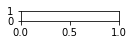

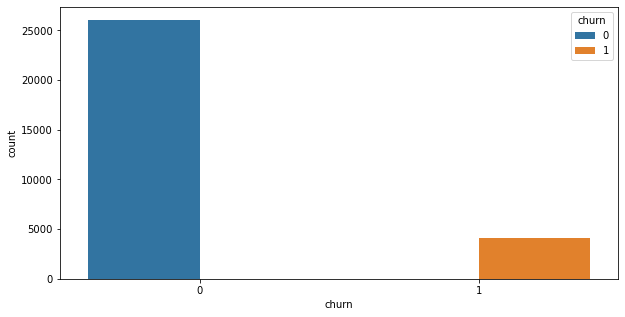

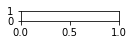

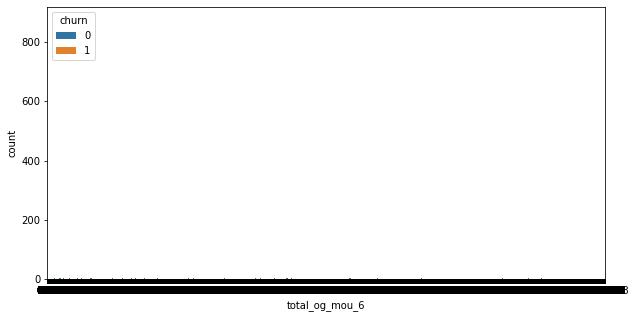

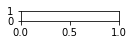

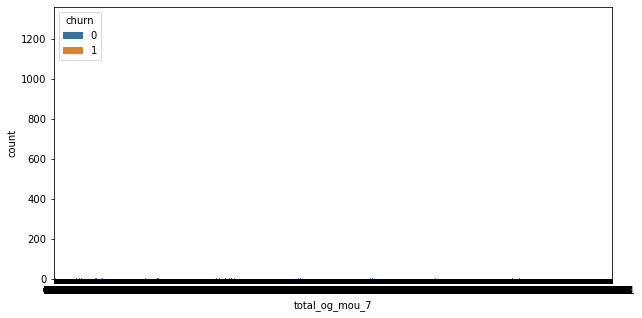

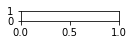

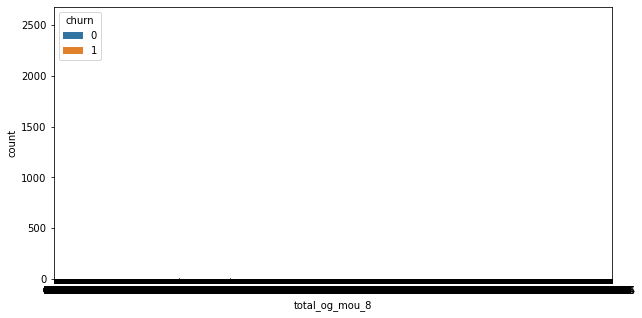

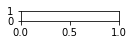

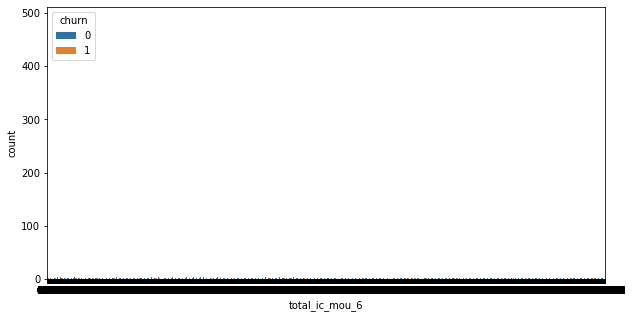

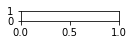

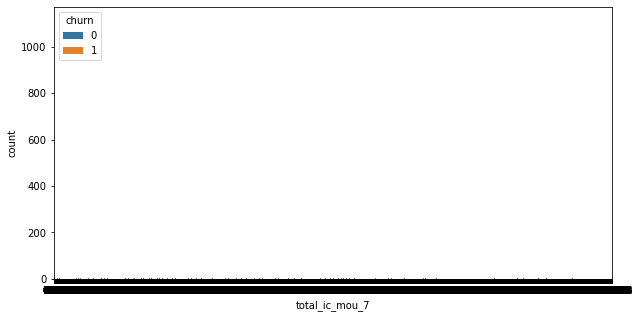

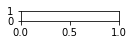

KeyboardInterrupt: 

In [36]:
count=1
n=len(plist)
for items in plist:
    plt.subplot(n,3,count)
    plt.subplots(figsize=(10, 5))
    sns.countplot(x=items, hue='churn', data=plote)
    count+=1
    plt.show()
    

In [355]:
high_value_cust_final.describe().transpose()

count         mean         std      min      25%  \
last_rech__days_6         27237.0     3.502295    4.456877    0.000    0.000   
last_rech__days_7         27237.0     4.483240    5.248648    0.000    1.000   
last_rech__days_8         27237.0     4.491647    5.478892    0.000    1.000   
date_of_last_rech_data_6  27237.0     5.384844    7.882029    0.000    0.000   
date_of_last_rech_data_7  27237.0     4.832838    7.830761    0.000    0.000   
date_of_last_rech_data_8  27237.0     4.989977    8.034280    0.000    0.000   
total_rech_data_6         27237.0     1.597569    2.690720    0.000    0.000   
total_rech_data_7         27237.0     1.425047    2.780248    0.000    0.000   
total_rech_data_8         27237.0     1.372618    2.730377    0.000    0.000   
max_rech_data_6           27237.0    70.420164   94.540414    0.000    0.000   
max_rech_data_7           27237.0    57.550171   89.613740    0.000    0.000   
max_rech_data_8           27237.0    56.774278   89.654050    0.000    0.000   
count_rech_2g_6           27237.0     1.240518    2.445705    0.000    0.000   
count_rech_2g_7           27237.0     1.117083    2.475817    0.000    0.000   
count_rech_2g_8           27237.0     1.064251    2.345111    0.000    0.000   
count_rech_3g_6           27237.0     0.357051    0.952474    0.000    0.000   
count_rech_3g_7           27237.0     0.307963    1.011260    0.000    0.000   
count_rech_3g_8           27237.0     0.308367    1.055847    0.000    0.000   
av_rech_amt_data_6        27237.0   112.096365  143.152757    0.000    0.000   
av_rech_amt_data_7        27237.0    95.527177  148.082844    0.000    0.000   
av_rech_amt_data_8        27237.0    92.753879  146.064178    0.000    0.000   
arpu_3g_6                 27237.0    48.259557  111.987644  -30.820    0.000   
arpu_2g_7                 27237.0    39.200998  103.068617  -15.480    0.000   
arpu_2g_8                 27237.0    38.946078  102.073535  -55.830    0.000   
night_pck_user_6          27237.0     0.011088    0.104715    0.000    0.000   
night_pck_user_7          27237.0     0.008591    0.092292    0.000    0.000   
night_pck_user_8          27237.0     0.008591    0.092292    0.000    0.000   
fb_user_6                 27237.0     0.501560    0.500007    0.000    0.000   
fb_user_7                 27237.0     0.425487    0.494426    0.000    0.000   
fb_user_8                 27237.0     0.408452    0.491556    0.000    0.000   
arpu_3g_7                 27237.0    40.975358  114.062010  -17.990    0.000   
arpu_3g_8                 27237.0    41.032365  112.097861  -24.490    0.000   
arpu_2g_6                 27237.0    46.943873  101.259235  -15.320    0.000   
arpu_6                    27237.0   467.211484  225.725454 -147.690  318.324   
arpu_7                    27237.0   411.923511  289.288683 -282.788  213.787   
arpu_8                    27237.0   389.565746  309.715517 -146.859  172.493   
onnet_mou_6               27237.0   206.732227  285.291551    0.000   18.810   
onnet_mou_7               27237.0   188.336269  321.509578    0.000   11.380   
onnet_mou_8               27237.0   172.737701  324.350209    0.000    6.630   
offnet_mou_6              27237.0   302.831533  297.954457    0.000   76.510   
offnet_mou_7              27237.0   275.329743  333.327630    0.000   48.540   
offnet_mou_8              27237.0   253.706913  332.890356    0.000   30.560   
roam_ic_mou_6             27237.0     9.007654   31.614245    0.000    0.000   
roam_ic_mou_7             27237.0     7.664172   44.910546    0.000    0.000   
roam_ic_mou_8             27237.0     7.975014   47.828260    0.000    0.000   
roam_og_mou_6             27237.0    16.743713   56.346422    0.000    0.000   
roam_og_mou_7             27237.0    12.682439   59.885713    0.000    0.000   
roam_og_mou_8             27237.0    12.726629   66.211532    0.000    0.000   
loc_og_t2t_mou_6          27237.0    60.991340   99.951922    0.000    4.960   
loc_og_t2t_mou_7          27

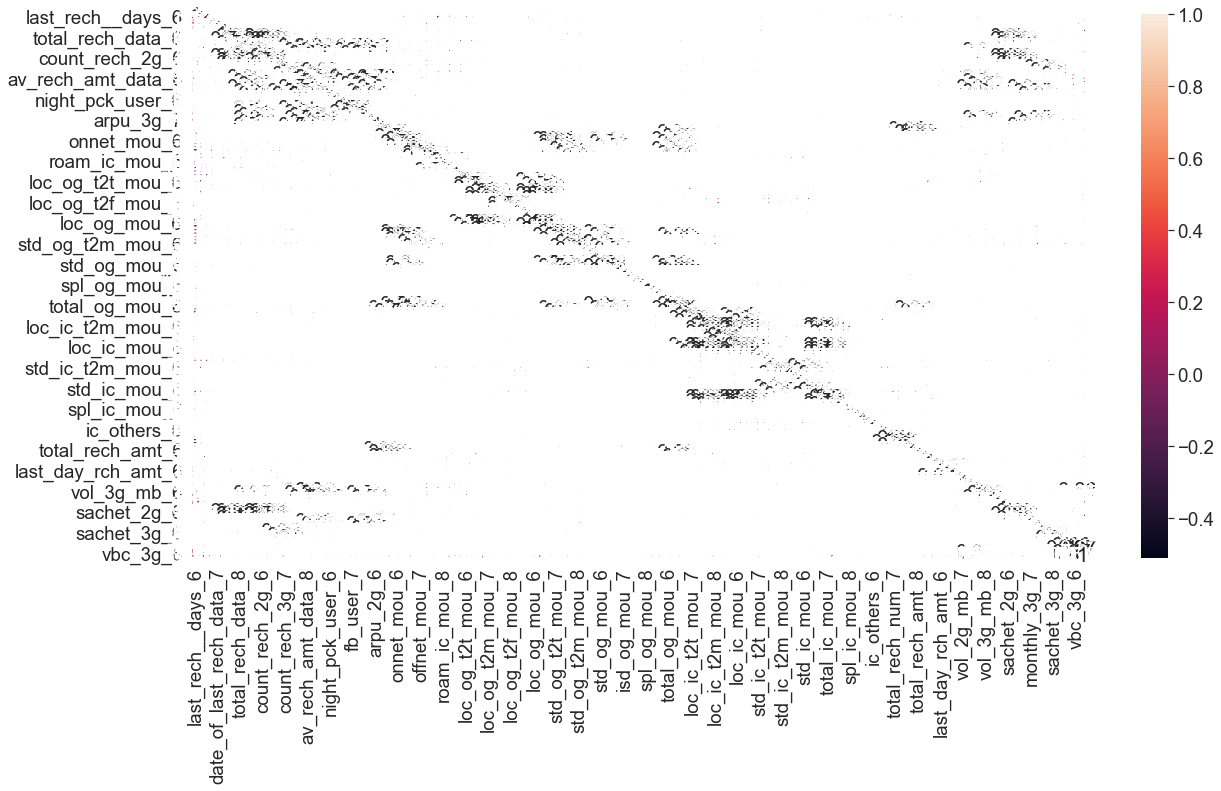

In [356]:
plt.figure(figsize = (20,10))
sns.heatmap(high_value_cust_final.corr(),annot = True)
plt.show()

# Spliting Test-Train Split

In [360]:
X= high_value_cust_final.drop(["churn"],axis=1)
y = high_value_cust_final["churn"]
print(X.head())
print(y.head())

    last_rech__days_6  last_rech__days_7  last_rech__days_8  \
0                 9.0               15.0               23.0   
8                 5.0                0.0                1.0   
16                0.0                0.0               17.0   
17                0.0                1.0                6.0   
20               16.0               21.0                4.0   

    date_of_last_rech_data_6  date_of_last_rech_data_7  \
0                        9.0                      15.0   
8                        0.0                       0.0   
16                       0.0                       0.0   
17                       0.0                       0.0   
20                       0.0                       0.0   

    date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
0                       23.0                1.0                1.0   
8                        8.0                0.0                2.0   
16                       0.0                0.0               

In [361]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state = 100)

# Feature Scaling

In [362]:
num_cols1 = print_num(X_train)
num_cols1

['last_rech__days_6',
 'last_rech__days_7',
 'last_rech__days_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7'

In [363]:
scaler = StandardScaler()
X_train[num_cols1] = scaler.fit_transform(X_train[num_cols1])
X_test[num_cols1] = scaler.transform(X_test[num_cols1])

In [364]:
print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(19065, 157)
(8172, 157)
       last_rech__days_6  last_rech__days_7  last_rech__days_8  \
77300          -0.782533           0.293441          -0.820457   
49157           0.345523          -0.662549          -0.820457   
61463          -0.782533          -0.280153          -0.820457   
17205          -0.331310          -0.471351           0.637122   
99672           1.247967           1.823025          -0.820457   

       date_of_last_rech_data_6  date_of_last_rech_data_7  \
77300                  -0.68488                 -0.618304   
49157                  -0.68488                 -0.618304   
61463                  -0.68488                 -0.618304   
17205                  -0.68488                 -0.618304   
99672                  -0.68488                 -0.618304   

       date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
77300                 -0.621204          -0.594362          -0.512933   
49157                 -0.621204          -0.594362          -0.51

In [365]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
17            count_rech_3g_8           inf
148              monthly_3g_7           inf
144               sachet_2g_6           inf
147              monthly_3g_6           inf
145               sachet_2g_7           inf
143              monthly_2g_8           inf
142              monthly_2g_7           inf
16            count_rech_3g_7           inf
15            count_rech_3g_6           inf
14            count_rech_2g_8           inf
13            count_rech_2g_7           inf
12            count_rech_2g_6           inf
141              monthly_2g_6           inf
8           total_rech_data_8           inf
7           total_rech_data_7           inf
6           total_rech_data_6           inf
150               sachet_3g_6           inf
151               sachet_3g_7           inf
152               sachet_3g_8           inf
146               sachet_2g_8           inf
149              monthly_3g_8           inf
73               std_og_mou_7  1.668334e+10
74               std_og_mou_8  1.664618e+10
72               std_og_mou_6  1.202732e+10
86             total_og_mou_8  8.307492e+09
85             total_og_mou_7  8.043327e+09
64           std_og_t2t_mou_7  5.454334e+09
65           std_og_t2t_mou_8  5.441361e+09
84             total_og_mou_6  5.027904e+09
67           std_og_t2m_mou_7  4.596204e+09
68           std_og_t2m_mou_8  4.318823e+09
63           std_og_t2t_mou_6  4.080909e+09
62               loc_og_mou_8  4.024447e+09
61               loc_og_mou_7  3.811327e+09
66           std_og_t2m_mou_6  3.634905e+09
98               loc_ic_mou_8  3.059421e+09
97               loc_ic_mou_7  2.843539e+09
60               loc_og_mou_6  2.759130e+09
96               loc_ic_mou_6  2.149026e+09
113            total_ic_mou_8  2.106736e+09
112            total_ic_mou_7  2.035263e+09
111            total_ic_mou_6  1.423300e+09
53           loc_og_t2m_mou_8  1.144548e+09
52           loc_og_t2m_mou_7  1.121798e+09
51           loc_og_t2m_mou_6  9.126498e+08
92           loc_ic_t2m_mou_8  8.541936e+08
91           loc_ic_t2m_mou_7  8.512065e+08
90           loc_ic_t2m_mou_6  6.843100e+08
49           loc_og_t2t_mou_7  5.772376e+08
50           loc_og_t2t_mou_8  5.097293e+08
110              std_ic_mou_8  4.488756e+08
109              std_ic_mou_7  4.042401e+08
89           loc_ic_t2t_mou_8  3.502682e+08
48           loc_og_t2t_mou_6  3.282049e+08
88           loc_ic_t2t_mou_7  3.136837e+08
108              std_ic_mou_6  2.290884e+08
87           loc_ic_t2t_mou_6  2.072880e+08
104          std_ic_t2m_mou_8  1.796116e+08
103          std_ic_t2m_mou_7  1.700386e+08
102          std_ic_t2m_mou_6  1.028919e+08
119              isd_ic_mou_8  6.699840e+07
101          std_ic_t2t_mou_8  6.614500e+07
100          std_ic_t2t_mou_7  5.276138e+07
94           loc_ic_t2f_mou_7  3.527811e+07
95           loc_ic_t2f_mou_8  3.243634e+07
99           std_ic_t2t_mou_6  2.708669e+07
118              isd_ic_mou_7  2.546115e+07
93           loc_ic_t2f_mou_6  1.992908e+07
117              isd_ic_mou_6  1.024260e+07
80               spl_og_mou_8  6.888957e+06
79               spl_og_mou_7  6.200189e+06
106          std_ic_t2f_mou_7  6.152522e+06
55           loc_og_t2f_mou_7  5.090985e+06
56           loc_og_t2f_mou_8  4.945287e+06
54           loc_og_t2f_mou_6  3.799095e+06
107          std_ic_t2f_mou_8  3.772271e+06
78               spl_og_mou_6  2.961063e+06
105          std_ic_t2f_mou_6  2.118473e+06
71           std_og_t2f_mou_8  1.754558e+06
70           std_og_t2f_mou_7  1.500539e+06
69           std_og_t2f_mou_6  9.270697e+05
121               ic_others_7  6.971490e+05
122               ic_others_8  6.813328e+05
77               isd_og_mou_8  6.041279e+05
76               isd_og_mou_7  2.733619e+05
120               ic_others_6  8.760336e+04
81                og_others_6  7.895934e+04
75               isd_og_mou_6  4.078562e+04
39               offnet_mou_6  2.352678e+04
36                onnet_mou_6  2.206049e+04
83               

In [366]:
a= len(vif.Features)
count= 0
for i in range(a):
    count = 1 + count
    print(count)
    x =vif.iloc[0]["VIF"]
    print(x)
    name= vif.iloc[0]["Features"]
    print(name)
    if x > 5 or x=="inf":
        X_train = X_train.drop([name],axis=1)
        X_test = X_test.drop([name],axis=1)
        print("Deleted")
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
    else:
        break

1
inf
count_rech_3g_8
Deleted
2
inf
count_rech_2g_8
Deleted
3
inf
count_rech_2g_7
Deleted
4
inf
count_rech_3g_6
Deleted
5
inf
count_rech_3g_7
Deleted
6
inf
monthly_2g_7
Deleted
7
inf
monthly_3g_8
Deleted
8
inf
monthly_2g_6
Deleted
9
inf
monthly_3g_6
Deleted
10
16683335286.95
std_og_mou_7
Deleted
11
16536164610.31
std_og_mou_8
Deleted
12
11839707102.54
std_og_mou_6
Deleted
13
5777319474.62
total_og_mou_8
Deleted
14
5472304176.55
total_og_mou_7
Deleted
15
3435723507.52
total_og_mou_6
Deleted
16
3048874765.93
loc_ic_mou_8
Deleted
17
2807569408.34
loc_ic_mou_7
Deleted
18
2209838841.31
loc_og_mou_8
Deleted
19
2130690815.08
loc_og_mou_7
Deleted
20
2098106680.49
loc_ic_mou_6
Deleted
21
1609039586.06
loc_og_mou_6
Deleted
22
1087095489.79
total_ic_mou_7
Deleted
23
1026283564.38
total_ic_mou_8
Deleted
24
746609187.35
total_ic_mou_6
Deleted
25
289898195.26
std_ic_mou_8
Deleted
26
250825126.09
std_ic_mou_7
Deleted
27
145938884.75
std_ic_mou_6
Deleted
28
23496.39
offnet_mou_6
Deleted
29
7575.8
offn

In [173]:
from sklearn.tree import DecisionTreeClassifier

models = [('LR', LogisticRegression(solver='liblinear')),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('GB',GradientBoostingClassifier())]

In [174]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [175]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.903402 (0.006350)
CART: 0.879228 (0.005101)
RF: 0.919121 (0.004316)
GB: 0.920281 (0.004685)


# Base Line Model

###  Logistic Regression


In [367]:
lor = LogisticRegression(solver='liblinear')
lor_model = lor.fit(X_train, y_train)
y_pred = lor_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6837,  246],
       [ 502,  587]], dtype=int64)

In [368]:
cross_val_score(lor_model, X_test, y_test, cv=10).mean()

0.9049200515931325

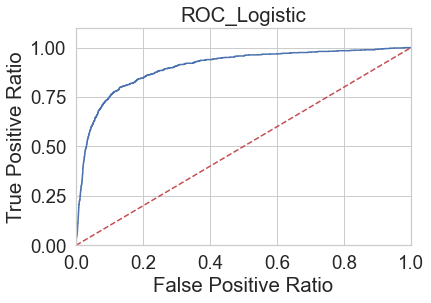

In [369]:
logit_roc_auc = roc_auc_score(y_test, lor_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lor_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC_Logistic')
plt.show();

In [370]:
auc_score = metrics.roc_auc_score( y_test, y_pred )
auc_score

0.7521477918844212

In [371]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7083
           1       0.70      0.54      0.61      1089

    accuracy                           0.91      8172
   macro avg       0.82      0.75      0.78      8172
weighted avg       0.90      0.91      0.90      8172



In [372]:
LR1 = ["0.91","0.93","0.97","0.95","0.70","0.54","0.61"]

### GB (GRADIENT BOOSTING)¶


In [373]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

Accuracy score:  0.9219285364659814
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7083
           1       0.75      0.63      0.68      1089

    accuracy                           0.92      8172
   macro avg       0.84      0.80      0.82      8172
weighted avg       0.92      0.92      0.92      8172



In [374]:
GMB1 = ["0.92","0.94","0.97","0.96","0.75","0.63","0.68"]

### RandomForest

In [375]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
#display(rfc_2.score(X_train_scaled_pca, y_train_sm))
y_pred_rfc = rfc.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

Accuracy score:  0.9198482623592755
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7083
           1       0.77      0.56      0.65      1089

    accuracy                           0.92      8172
   macro avg       0.85      0.77      0.80      8172
weighted avg       0.91      0.92      0.91      8172



In [376]:
RFC1 = ["0.92","0.94","0.97","0.95","0.77","0.56","0.65"]

In [377]:
conclusion_1 = pd.DataFrame({'LR' : LR1,
                             'GB' : GMB1,
                             'RFC':RFC1}, index=['accuracy', 'precision_0', 
                                                  'recall_0', 'f_1_score_0',
                                                  'precision_1', 'recall_1', 
                                                  'f_1_score_1']).T

In [378]:
X_train.shape

(19065, 104)

# PCA

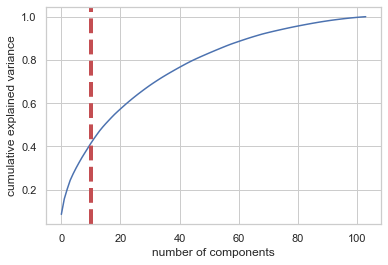

None

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.085189                  0.085189
1                    0.156882                  0.071693
2                    0.202648                  0.045766
3                    0.243112                  0.040464
4                    0.273011                  0.029899
5                    0.299939                  0.026929
6                    0.324932                  0.024993
7                    0.348819                  0.023887
8                    0.370946                  0.022127
9                    0.392801                  0.021855
10                   0.414289                  0.021488
11                   0.434778                  0.020489
12                   0.453952                  0.019174
13                   0.472689                  0.018738
14                   0.489291                  0.016602
15                   0.504767                  0.015476
16                   0.519419                  0.014652
17                   0.533953                  0.014534
18                   0.547833                  0.013880
19                   0.560721                  0.012888
20                   0.573191                  0.012470
21                   0.585428                  0.012237
22                   0.597491                  0.012063
23                   0.609084                  0.011593
24                   0.620514                  0.011430
25                   0.631487                  0.010973
26                   0.642255                  0.010768
27                   0.652605                  0.010350
28                   0.662864                  0.010260
29                   0.672856                  0.009992
30                   0.682616                  0.009760
31                   0.691930                  0.009314
32                   0.700984                  0.009054
33                   0.709819                  0.008835
34                   0.718452                  0.008633
35                   0.726756                  0.008304
36                   0.734878                  0.008122
37                   0.742779                  0.007901
38                   0.750587                  0.007809
39                   0.758344                  0.007757
40                   0.765912                  0.007568
41                   0.773376                  0.007463
42                   0.780793                  0.007418
43                   0.787936                  0.007143
44                   0.794835                  0.006899
45                   0.801397                  0.006562
46                   0.807716                  0.006320
47                   0.813865                  0.006149
48                   0.819870                  0.006005
49                   0.825845                  0.005975
50                   0.831761                  0.005916
51                   0.837552                  0.005791
52                   0.843306                  0.005754
53                   0.848970                  0.005664
54                   0.854625                  0.005655
55                   0.860226                  0.005601
56                   0.865706                  0.005481
57                   0.870993                  0.005287
58                   0.875960                  0.004966
59                   0.880674                  0.004715
60                   0.885357                  0.004683
61                   0.889964                  0.004606
62                   0.894531                  0.004567
63                   0.899057                  0.004526
64                   0.903380                  0.004323
65                   0.907617                  0.004237
66                   0.911701                  0.004083
67                   0.915759                  0.004058
68                   0.919649                  0.003890
69                   0.923157                  0.003508
70                   0.92654

In [379]:
pca_test = PCA(n_components=104)
pca_test.fit(X_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(100))

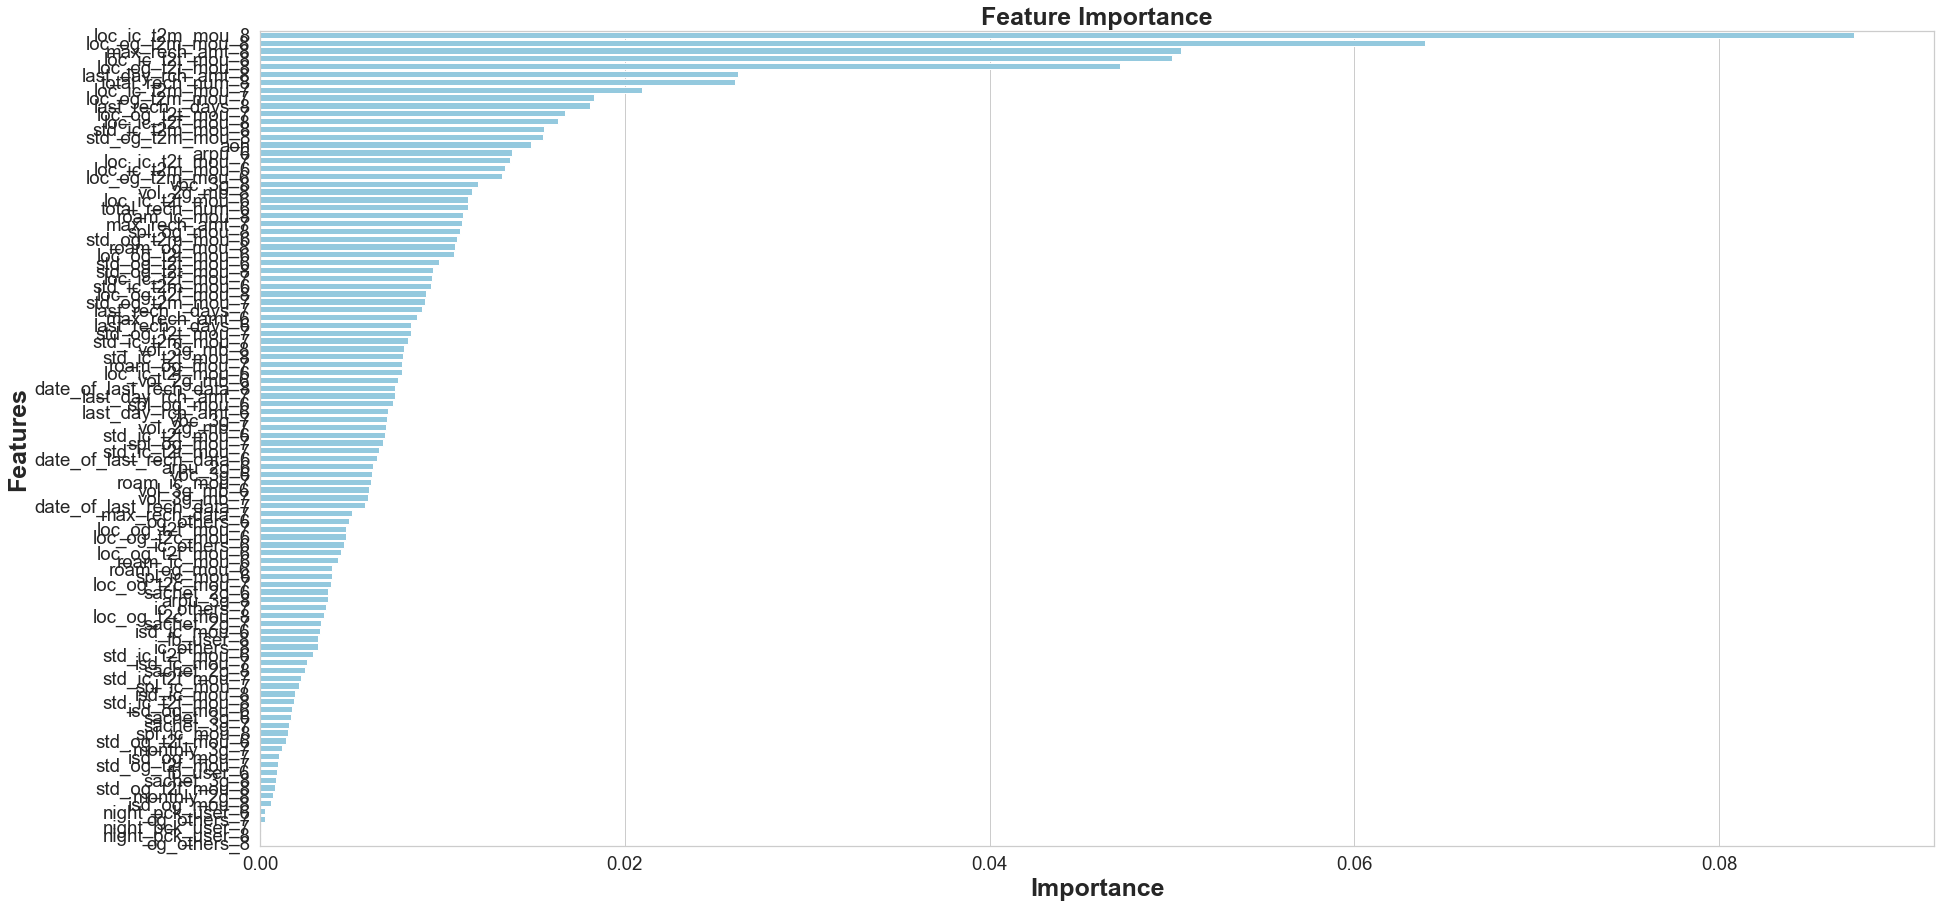

None

Features  Gini-Importance
0            loc_ic_t2m_mou_8         0.087406
1            loc_og_t2m_mou_8         0.063843
2              max_rech_amt_8         0.050481
3            loc_ic_t2t_mou_8         0.050019
4            loc_og_t2t_mou_8         0.047126
5          last_day_rch_amt_8         0.026227
6            total_rech_num_8         0.026028
7            loc_ic_t2m_mou_7         0.020927
8            loc_og_t2m_mou_7         0.018321
9           last_rech__days_8         0.018067
10           loc_og_t2t_mou_7         0.016711
11           loc_ic_t2f_mou_8         0.016319
12           std_ic_t2m_mou_8         0.015588
13           std_og_t2m_mou_8         0.015529
14                        aon         0.014846
15                     arpu_6         0.013824
16           loc_ic_t2t_mou_7         0.013727
17           loc_ic_t2m_mou_6         0.013454
18           loc_og_t2m_mou_6         0.013284
19                   vbc_3g_8         0.011972
20                vol_2g_mb_8         0.011601
21           loc_ic_t2t_mou_6         0.011423
22           total_rech_num_6         0.011404
23              roam_ic_mou_8         0.011099
24             max_rech_amt_7         0.011054
25               spl_og_mou_8         0.010939
26           std_og_t2m_mou_6         0.010785
27              roam_og_mou_8         0.010664
28           loc_og_t2t_mou_6         0.010631
29           std_og_t2t_mou_6         0.009794
30           std_og_t2t_mou_8         0.009487
31           loc_ic_t2f_mou_7         0.009415
32           std_ic_t2m_mou_6         0.009373
33           loc_og_t2f_mou_8         0.009107
34           std_og_t2m_mou_7         0.009020
35          last_rech__days_7         0.008850
36             max_rech_amt_6         0.008579
37          last_rech__days_6         0.008283
38           std_og_t2t_mou_7         0.008253
39           std_ic_t2m_mou_7         0.008087
40                vol_3g_mb_8         0.007872
41           std_ic_t2t_mou_8         0.007856
42              roam_og_mou_7         0.007777
43           loc_ic_t2f_mou_6         0.007758
44                vol_2g_mb_6         0.007542
45   date_of_last_rech_data_8         0.007393
46         last_day_rch_amt_7         0.007380
47               spl_og_mou_6         0.007298
48         last_day_rch_amt_6         0.007027
49                   vbc_3g_7         0.006965
50                vol_2g_mb_7         0.006896
51           std_ic_t2t_mou_6         0.006849
52               spl_og_mou_7         0.006745
53           std_ic_t2t_mou_7         0.006526
54   date_of_last_rech_data_6         0.006389
55                  arpu_2g_6         0.006165
56                   vbc_3g_6         0.006146
57              roam_ic_mou_7         0.006074
58                vol_3g_mb_6         0.005978
59                vol_3g_mb_7         0.005941
60   date_of_last_rech_data_7         0.005776
61            max_rech_data_7         0.005062
62                og_others_6         0.004874
63           loc_og_t2f_mou_7         0.004720
64           loc_og_t2c_mou_6         0.004707
65                ic_others_6         0.004577
66           loc_og_t2f_mou_6         0.004436
67              roam_ic_mou_6         0.004261
68              roam_og_mou_6         0.003957
69               spl_ic_mou_6         0.003923
70           loc_og_t2c_mou_7         0.003882
71                sachet_2g_6         0.003751
72                  arpu_3g_8         0.003738
73                ic_others_7         0.003626
74           loc_og_t2c_mou_8         0.003517
75                sachet_2g_7         0.003350
76               isd_ic_mou_6         0.003312
77                  fb_user_8         0.003185
78                ic_others_8         0.003170
79           std_ic_t2f_mou_6         0.002896
80               isd_ic_mou_7         0.002589
81                sachet_2g_8         0.002481
82           std_ic_t2f_mou_7         0.002266
83               spl_ic_mou_7         0.002137
84               isd_ic_mo

In [380]:
feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### PCA with 95% variance 77 Features

In [381]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=77)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca  = pca_final.transform(X_test)

### GB (GRADIENT BOOSTING) on PCA Selected Features

In [382]:
gbm_1 = GradientBoostingClassifier()
gbm_1.fit(df_train_pca, y_train)
y_pred_gbm_1 = gbm_1.predict(df_test_pca)
print("Accuracy score: ",accuracy_score(y_test, y_pred_gbm_1))
print(classification_report(y_test, y_pred_gbm_1))

Accuracy score:  0.8923152227116985
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7083
           1       0.68      0.37      0.48      1089

    accuracy                           0.89      8172
   macro avg       0.79      0.67      0.71      8172
weighted avg       0.88      0.89      0.88      8172



In [383]:
GBM2 = ["0.89","0.91","0.97","0.94","0.68","0.37","0.48"]

### RandomForest on PCA Selected Features

In [384]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(df_train_pca, y_train)
#display(rfc_2.score(X_train_scaled_pca, y_train_sm))
y_pred_rfc_1 = rfc_1.predict(df_test_pca)
print("Accuracy score: ",accuracy_score(y_test, y_pred_rfc_1))
print(classification_report(y_test, y_pred_rfc_1))

Accuracy score:  0.8855849241311796
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7083
           1       0.71      0.24      0.36      1089

    accuracy                           0.89      8172
   macro avg       0.80      0.61      0.65      8172
weighted avg       0.87      0.89      0.86      8172



In [385]:
RFC2 = ["0.89","0.89","0.99","0.94","0.71","0.24","0.36"]

### Logistic Regression with PCA Selected Features

In [386]:
lor_2 = LogisticRegression(solver='liblinear')
lor_model_2 = lor_2.fit(df_train_pca, y_train)
y_pred_2 = lor_model_2.predict(df_test_pca)
confusion_matrix(y_test, y_pred_2)

array([[6846,  237],
       [ 531,  558]], dtype=int64)

In [387]:
cross_val_score(lor_model_2, df_test_pca, y_test, cv=10).mean()

0.9038202559905193

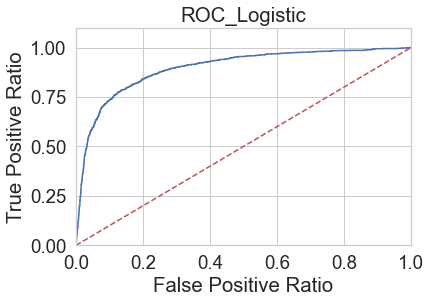

In [388]:
logit_roc_auc = roc_auc_score(y_test, lor_model_2.predict(df_test_pca))
fpr, tpr, thresholds = roc_curve(y_test, lor_model_2.predict_proba(df_test_pca)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC_Logistic')
plt.show();

In [389]:
auc_score = metrics.roc_auc_score( y_test, y_pred_2 )
auc_score

0.7394681480392467

In [390]:
print(classification_report(y_test, y_pred_2))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7083
           1       0.70      0.51      0.59      1089

    accuracy                           0.91      8172
   macro avg       0.81      0.74      0.77      8172
weighted avg       0.90      0.91      0.90      8172



In [391]:
LR2=["0.91","0.93","0.97","0.95","0.70","0.51","0.59"]

In [392]:
conclusion_2 = pd.DataFrame({'LR' : LR2,
                             'GB' : GBM2,
                             'RFC':RFC2}, index=['accuracy', 'precision_0', 
                                                  'recall_0', 'f_1_score_0',
                                                  'precision_1', 'recall_1', 
                                                  'f_1_score_1']).T

# Handle the imbalance class

In [393]:
counter = collections.Counter(y_train)
print("Before",counter)

Before Counter({0: 16534, 1: 2531})


In [394]:
smt = SMOTE(random_state=42)
X_train_sm, y_train_sm =  smt.fit_sample(df_train_pca, y_train)

In [395]:
counter = collections.Counter(y_train_sm)
print("After",counter)

After Counter({0: 16534, 1: 16534})


### Logistic Regression with  PCA and handling imbalance class

In [396]:
lor_3 = LogisticRegression(solver='liblinear')
lor_model_3 = lor_3.fit(X_train_sm, y_train_sm)
y_pred_3 = lor_model_3.predict(df_test_pca)
confusion_matrix(y_test, y_pred_3)

array([[5870, 1213],
       [ 204,  885]], dtype=int64)

In [397]:
auc_score = metrics.roc_auc_score( y_test, y_pred_3 )
auc_score

0.8207085292103196

In [398]:
cross_val_score(lor_model_3, df_test_pca, y_test, cv=10).mean()

0.9038202559905193

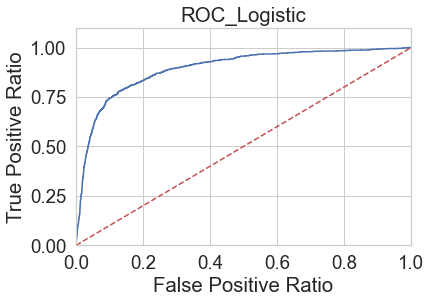

In [399]:
logit_roc_auc = roc_auc_score(y_test, lor_model_3.predict(df_test_pca))
fpr, tpr, thresholds = roc_curve(y_test, lor_model_3.predict_proba(df_test_pca)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC_Logistic')
plt.show();

In [400]:
print(classification_report(y_test, y_pred_3))


              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7083
           1       0.42      0.81      0.56      1089

    accuracy                           0.83      8172
   macro avg       0.69      0.82      0.72      8172
weighted avg       0.89      0.83      0.85      8172



In [401]:
LR3=["0.83","0.97","0.83","0.89","0.42","0.81","0.56"]

### GB (GRADIENT BOOSTING) on PCA Selected Features and handling imbalance class


In [402]:
gbm_2 = GradientBoostingClassifier()
gbm_2.fit(X_train_sm, y_train_sm)
y_pred_gbm_2 = gbm_2.predict(df_test_pca)
print("Accuracy score: ",accuracy_score(y_test, y_pred_gbm_2))
print(classification_report(y_test, y_pred_gbm_2))

Accuracy score:  0.8383504650024474
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7083
           1       0.44      0.79      0.57      1089

    accuracy                           0.84      8172
   macro avg       0.70      0.82      0.73      8172
weighted avg       0.89      0.84      0.86      8172



In [403]:
GBM3=["0.84","0.96","0.85","0.90","0.44","0.79","0.57"]

### RandomForest on PCA Selected Features and handling imbalance class

In [404]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_sm, y_train_sm)
#display(rfc_2.score(X_train_scaled_pca, y_train_sm))
y_pred_rfc_2 = rfc_2.predict(df_test_pca)
print("Accuracy score: ",accuracy_score(y_test, y_pred_rfc_2))
print(classification_report(y_test, y_pred_rfc_2))

Accuracy score:  0.8820362212432697
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7083
           1       0.56      0.55      0.55      1089

    accuracy                           0.88      8172
   macro avg       0.74      0.74      0.74      8172
weighted avg       0.88      0.88      0.88      8172



In [405]:
RFC3=["0.88","0.93","0.93","0.93","0.56","0.55","0.55"]

In [406]:
conclusion_3 = pd.DataFrame ({'LR' : LR3,
                             'GB' : GBM3,
                             'RFC':RFC3}, index=['accuracy', 'precision_0', 
                                                  'recall_0', 'f_1_score_0',
                                                  'precision_1', 'recall_1', 
                                                  'f_1_score_1']).T

### GB (GRADIENT BOOSTING) with GridSearchCV on PCA Selected Features

In [407]:
rfc3_params = {"n_estimators": [100,500,1000],
               "max_depth": [3,5,10],
               "min_samples_split": [2,5,10]}

In [176]:
rfc_3 = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc_3, rfc3_params, cv = 5, n_jobs = 1, verbose = 2)
rfc_cv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  37.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  36.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  37.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  36.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  37.4s
[CV] END max_depth=3, min_samples_split=2, n_estimators=1000; total time= 1.3min
[CV] END max_depth=3, min_samples_split=2, n_es

[CV] END max_depth=10, min_samples_split=2, n_estimators=1000; total time= 3.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=1000; total time= 3.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=1000; total time= 4.0min
[CV] END max_depth=10, min_samples_split=2, n_estimators=1000; total time= 4.1min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  22.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  22.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  23.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  23.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  26.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=500; total time= 1.7min
[CV] END max_depth=10, min_samples_split=5, n_estimators=500; total time= 1.7min
[CV] END max_depth=10, min_samples_split=5, n_estimators=500; total time= 1.6min
[CV] END max_depth=10, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [178]:
print('Best scor : ' + str(rfc_cv.best_score_))
print('Best parameters : ' + str(rfc_cv.best_params_))

Best scor : 0.8898765432098766
Best parameters : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}


In [408]:
rfc4_tuned = GradientBoostingClassifier(learning_rate=0.05,
                                      max_depth=10,
                                      min_samples_split=2,
                                      n_estimators=500)
rfc4_tuned.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.05, max_depth=10, n_estimators=500)

In [409]:
y_pred_cv = rfc4_tuned.predict(df_test_pca)
accuracy_score(y_test, y_pred_cv)

0.8869309838472834

In [410]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7083
           1       0.57      0.62      0.59      1089

    accuracy                           0.89      8172
   macro avg       0.76      0.78      0.76      8172
weighted avg       0.89      0.89      0.89      8172



In [411]:
GBC4=["0.89","0.94","0.93","0.93","0.57","0.62","0.59"]

### RandomForest with GridSearchCV on PCA Selected Features

In [412]:
rfc_4 = RandomForestClassifier(max_depth=10,
                               min_samples_split=2,
                               n_estimators=500)
rfc_4.fit(X_train_sm, y_train_sm)
#display(rfc_2.score(X_train_scaled_pca, y_train_sm))
y_pred_rfc_4 = rfc_4.predict(df_test_pca)
print("Accuracy score: ",accuracy_score(y_test, y_pred_rfc_4))
print(classification_report(y_test, y_pred_rfc_4))

Accuracy score:  0.8526676456191875
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7083
           1       0.46      0.70      0.56      1089

    accuracy                           0.85      8172
   macro avg       0.71      0.79      0.74      8172
weighted avg       0.89      0.85      0.86      8172



In [413]:
RFC4=["0.85","0.95","0.88","0.91","0.46","0.70","0.56"]

In [414]:
conclusion_4 = pd.DataFrame ({'GB' : GBC4,
                              'RFC': RFC4}, index=['accuracy', 'precision_0', 
                                                  'recall_0', 'f_1_score_0',
                                                  'precision_1', 'recall_1', 
                                                  'f_1_score_1']).T

# Model Conclusions

In [415]:
print("Base Line Models conclusion")
print(conclusion_1)
print("---------------------------------------------------------------------------------------")
print("Models with PCA conclusion")
print(conclusion_2)
print("--------------------------------------------------------------------------------------")
print("Models with PCA and handling imbalance class conclusion")
print(conclusion_3)
print("--------------------------------------------------------------------------------------")
print("Models with PCA,handling imbalance class and gridsearchCV conclusion")
print(conclusion_4)

Base Line Models conclusion
    accuracy precision_0 recall_0 f_1_score_0 precision_1 recall_1 f_1_score_1
LR      0.91        0.93     0.97        0.95        0.70     0.54        0.61
GB      0.92        0.94     0.97        0.96        0.75     0.63        0.68
RFC     0.92        0.94     0.97        0.95        0.77     0.56        0.65
---------------------------------------------------------------------------------------
Models with PCA conclusion
    accuracy precision_0 recall_0 f_1_score_0 precision_1 recall_1 f_1_score_1
LR      0.91        0.93     0.97        0.95        0.70     0.51        0.59
GB      0.89        0.91     0.97        0.94        0.68     0.37        0.48
RFC     0.89        0.89     0.99        0.94        0.71     0.24        0.36
--------------------------------------------------------------------------------------
Models with PCA and handling imbalance class conclusion
    accuracy precision_0 recall_0 f_1_score_0 precision_1 recall_1 f_1_score_1
LR 

# Feature importances

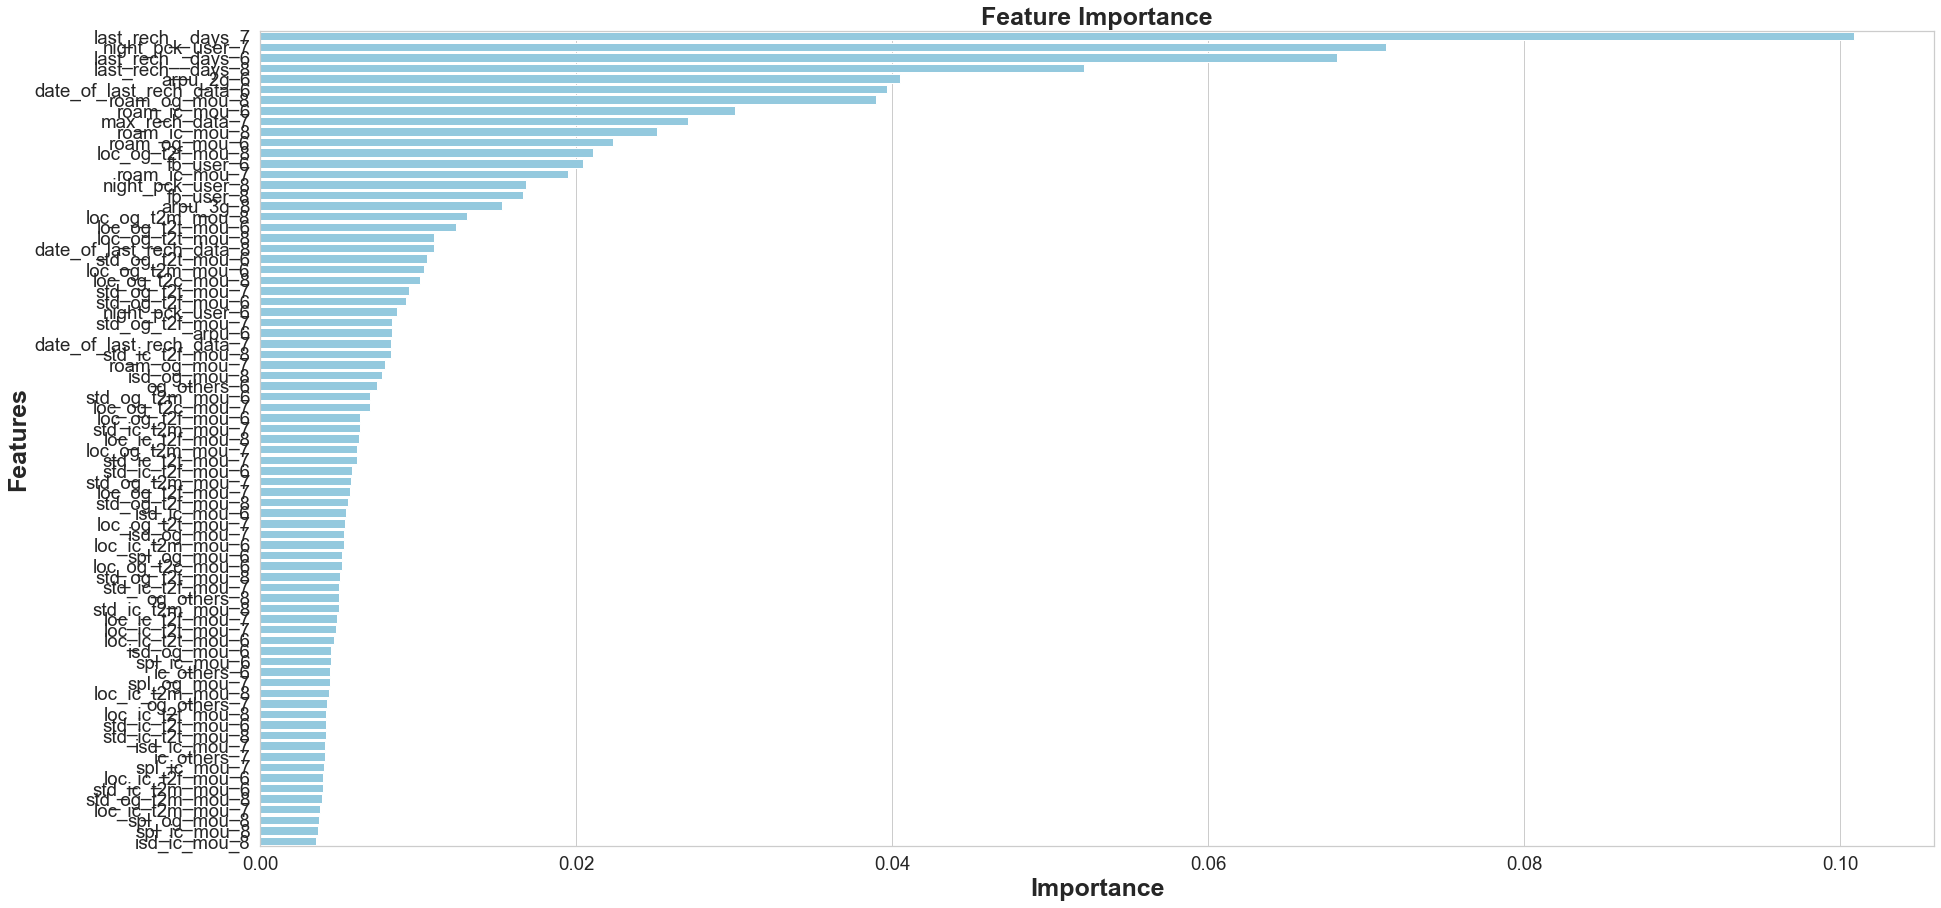

None

Features  Gini-Importance
0          last_rech__days_7         0.100898
1           night_pck_user_7         0.071257
2          last_rech__days_6         0.068139
3          last_rech__days_8         0.052164
4                  arpu_2g_6         0.040513
5   date_of_last_rech_data_6         0.039697
6              roam_og_mou_8         0.038981
7              roam_ic_mou_6         0.030031
8            max_rech_data_7         0.027093
9              roam_ic_mou_8         0.025109
10             roam_og_mou_6         0.022349
11          loc_og_t2f_mou_8         0.021044
12                 fb_user_6         0.020427
13             roam_ic_mou_7         0.019463
14          night_pck_user_8         0.016820
15                 fb_user_8         0.016617
16                 arpu_3g_8         0.015309
17          loc_og_t2m_mou_8         0.013106
18          loc_og_t2t_mou_6         0.012397
19          loc_og_t2t_mou_8         0.011009
20  date_of_last_rech_data_8         0.010987
21          std_og_t2t_mou_6         0.010563
22          loc_og_t2m_mou_6         0.010363
23          loc_og_t2c_mou_8         0.010142
24          std_og_t2t_mou_7         0.009445
25          std_og_t2f_mou_6         0.009253
26          night_pck_user_6         0.008663
27          std_og_t2f_mou_7         0.008377
28                    arpu_6         0.008329
29  date_of_last_rech_data_7         0.008293
30          std_ic_t2f_mou_8         0.008269
31             roam_og_mou_7         0.007922
32              isd_og_mou_8         0.007719
33               og_others_6         0.007396
34          std_og_t2m_mou_6         0.006951
35          loc_og_t2c_mou_7         0.006941
36          loc_og_t2f_mou_6         0.006341
37          std_ic_t2m_mou_7         0.006292
38          loc_ic_t2f_mou_8         0.006271
39          loc_og_t2m_mou_7         0.006129
40          std_ic_t2t_mou_7         0.006113
41          std_ic_t2f_mou_6         0.005833
42          std_og_t2m_mou_7         0.005786
43          loc_og_t2f_mou_7         0.005665
44          std_og_t2f_mou_8         0.005545
45              isd_ic_mou_6         0.005440
46          loc_og_t2t_mou_7         0.005394
47              isd_og_mou_7         0.005325
48          loc_ic_t2m_mou_6         0.005314
49              spl_og_mou_6         0.005175
50          loc_og_t2c_mou_6         0.005166
51          std_og_t2t_mou_8         0.005053
52          std_ic_t2f_mou_7         0.004995
53               og_others_8         0.004992
54          std_ic_t2m_mou_8         0.004988
55          loc_ic_t2f_mou_7         0.004889
56          loc_ic_t2t_mou_7         0.004785
57          loc_ic_t2t_mou_6         0.004688
58              isd_og_mou_6         0.004492
59              spl_ic_mou_6         0.004464
60               ic_others_6         0.004421
61              spl_og_mou_7         0.004396
62          loc_ic_t2m_mou_8         0.004378
63               og_others_7         0.004238
64          loc_ic_t2t_mou_8         0.004190
65          std_ic_t2t_mou_6         0.004168
66          std_ic_t2t_mou_8         0.004158
67              isd_ic_mou_7         0.004131
68               ic_others_7         0.004112
69              spl_ic_mou_7         0.004076
70          loc_ic_t2f_mou_6         0.004011
71          std_ic_t2m_mou_6         0.003954
72          std_og_t2m_mou_8         0.003905
73          loc_ic_t2m_mou_7         0.003762
74              spl_og_mou_8         0.003745
75              spl_ic_mou_8         0.003635
76              isd_ic_mou_8         0.003543

In [426]:
feats = {}
for feature, importance in zip(X_train.columns, rfc_4.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [423]:
importances

Features  Gini-Importance
0          last_rech__days_7         0.100898
1           night_pck_user_7         0.071257
2          last_rech__days_6         0.068139
3          last_rech__days_8         0.052164
4                  arpu_2g_6         0.040513
5   date_of_last_rech_data_6         0.039697
6              roam_og_mou_8         0.038981
7              roam_ic_mou_6         0.030031
8            max_rech_data_7         0.027093
9              roam_ic_mou_8         0.025109
10             roam_og_mou_6         0.022349
11          loc_og_t2f_mou_8         0.021044
12                 fb_user_6         0.020427
13             roam_ic_mou_7         0.019463
14          night_pck_user_8         0.016820
15                 fb_user_8         0.016617
16                 arpu_3g_8         0.015309
17          loc_og_t2m_mou_8         0.013106
18          loc_og_t2t_mou_6         0.012397
19          loc_og_t2t_mou_8         0.011009
20  date_of_last_rech_data_8         0.010987
21          std_og_t2t_mou_6         0.010563
22          loc_og_t2m_mou_6         0.010363
23          loc_og_t2c_mou_8         0.010142
24          std_og_t2t_mou_7         0.009445
25          std_og_t2f_mou_6         0.009253
26          night_pck_user_6         0.008663
27          std_og_t2f_mou_7         0.008377
28                    arpu_6         0.008329
29  date_of_last_rech_data_7         0.008293
30          std_ic_t2f_mou_8         0.008269
31             roam_og_mou_7         0.007922
32              isd_og_mou_8         0.007719
33               og_others_6         0.007396
34          std_og_t2m_mou_6         0.006951
35          loc_og_t2c_mou_7         0.006941
36          loc_og_t2f_mou_6         0.006341
37          std_ic_t2m_mou_7         0.006292
38          loc_ic_t2f_mou_8         0.006271
39          loc_og_t2m_mou_7         0.006129
40          std_ic_t2t_mou_7         0.006113
41          std_ic_t2f_mou_6         0.005833
42          std_og_t2m_mou_7         0.005786
43          loc_og_t2f_mou_7         0.005665
44          std_og_t2f_mou_8         0.005545
45              isd_ic_mou_6         0.005440
46          loc_og_t2t_mou_7         0.005394
47              isd_og_mou_7         0.005325
48          loc_ic_t2m_mou_6         0.005314
49              spl_og_mou_6         0.005175
50          loc_og_t2c_mou_6         0.005166
51          std_og_t2t_mou_8         0.005053
52          std_ic_t2f_mou_7         0.004995
53               og_others_8         0.004992
54          std_ic_t2m_mou_8         0.004988
55          loc_ic_t2f_mou_7         0.004889
56          loc_ic_t2t_mou_7         0.004785
57          loc_ic_t2t_mou_6         0.004688
58              isd_og_mou_6         0.004492
59              spl_ic_mou_6         0.004464
60               ic_others_6         0.004421
61              spl_og_mou_7         0.004396
62          loc_ic_t2m_mou_8         0.004378
63               og_others_7         0.004238
64          loc_ic_t2t_mou_8         0.004190
65          std_ic_t2t_mou_6         0.004168
66          std_ic_t2t_mou_8         0.004158
67              isd_ic_mou_7         0.004131
68               ic_others_7         0.004112
69              spl_ic_mou_7         0.004076
70          loc_ic_t2f_mou_6         0.004011
71          std_ic_t2m_mou_6         0.003954
72          std_og_t2m_mou_8         0.003905
73          loc_ic_t2m_mou_7         0.003762
74              spl_og_mou_8         0.003745
75              spl_ic_mou_8         0.003635
76              isd_ic_mou_8         0.003543

Feature: 0, Score: -0.45658
Feature: 1, Score: -0.59861
Feature: 2, Score: -0.51285
Feature: 3, Score: -0.43595
Feature: 4, Score: -0.23166
Feature: 5, Score: 0.08563
Feature: 6, Score: 0.14350
Feature: 7, Score: 0.03126
Feature: 8, Score: 0.23093
Feature: 9, Score: -0.02047
Feature: 10, Score: -0.09175
Feature: 11, Score: 0.18770
Feature: 12, Score: -0.03068
Feature: 13, Score: -0.25580
Feature: 14, Score: 0.00795
Feature: 15, Score: 0.25138
Feature: 16, Score: -0.30591
Feature: 17, Score: -0.14653
Feature: 18, Score: -0.55480
Feature: 19, Score: -0.21422
Feature: 20, Score: -0.52079
Feature: 21, Score: -0.01171
Feature: 22, Score: 0.05828
Feature: 23, Score: 0.00811
Feature: 24, Score: -0.00830
Feature: 25, Score: -0.11594
Feature: 26, Score: -0.34172
Feature: 27, Score: 0.11395
Feature: 28, Score: -0.26257
Feature: 29, Score: 0.59413
Feature: 30, Score: -0.10443
Feature: 31, Score: -0.37959
Feature: 32, Score: 0.12492
Feature: 33, Score: 0.27468
Feature: 34, Score: 0.13628
Feature: 

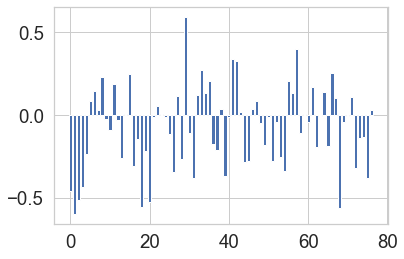

In [422]:
# in Logistic Regression Feature Importance
from matplotlib import pyplot
importance = lor_3.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()